In [1]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from catboost import Pool

import shap

import warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [5]:
df=pd.read_csv(r"C:\Users\wanja\OneDrive\Desktop\Telecom Churn Analysis\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Manupulation

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.shape

(7043, 21)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [16]:
df['TotalCharges'].isnull().sum()

11

In [18]:
df['tenure'].isin([0]).sum()

11

In [19]:
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [20]:
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)
df['TotalCharges'].isnull().sum()

0

In [21]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)
senior_map = {'0': 'No', '1': 'Yes'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(senior_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

customerID - # unique values: 7043
gender - # unique values: 2
SeniorCitizen - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
Churn - # unique values: 2


In [23]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

customerID 

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64 

gender 

gender
Male      3555
Female    3488
Name: count, dtype: int64 

SeniorCitizen 

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64 

Partner 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

PhoneService 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

MultipleLines 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

InternetService 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

OnlineSecurity 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name:

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


## EDA-Exploratory Data Analysis

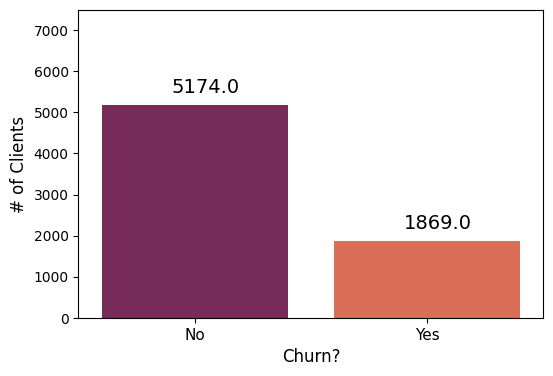

In [30]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Churn", data=df, palette="rocket")
plt.xlabel("Churn?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,7500)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.show()

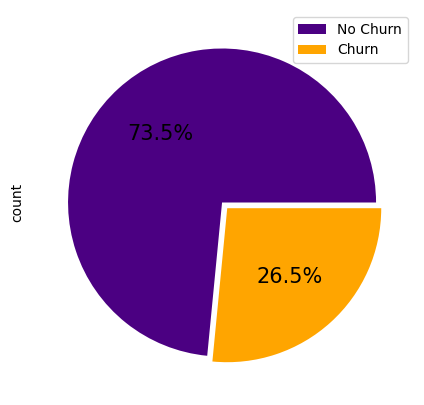

In [32]:
plt.figure(figsize=(7,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','orange'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

In [33]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [34]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

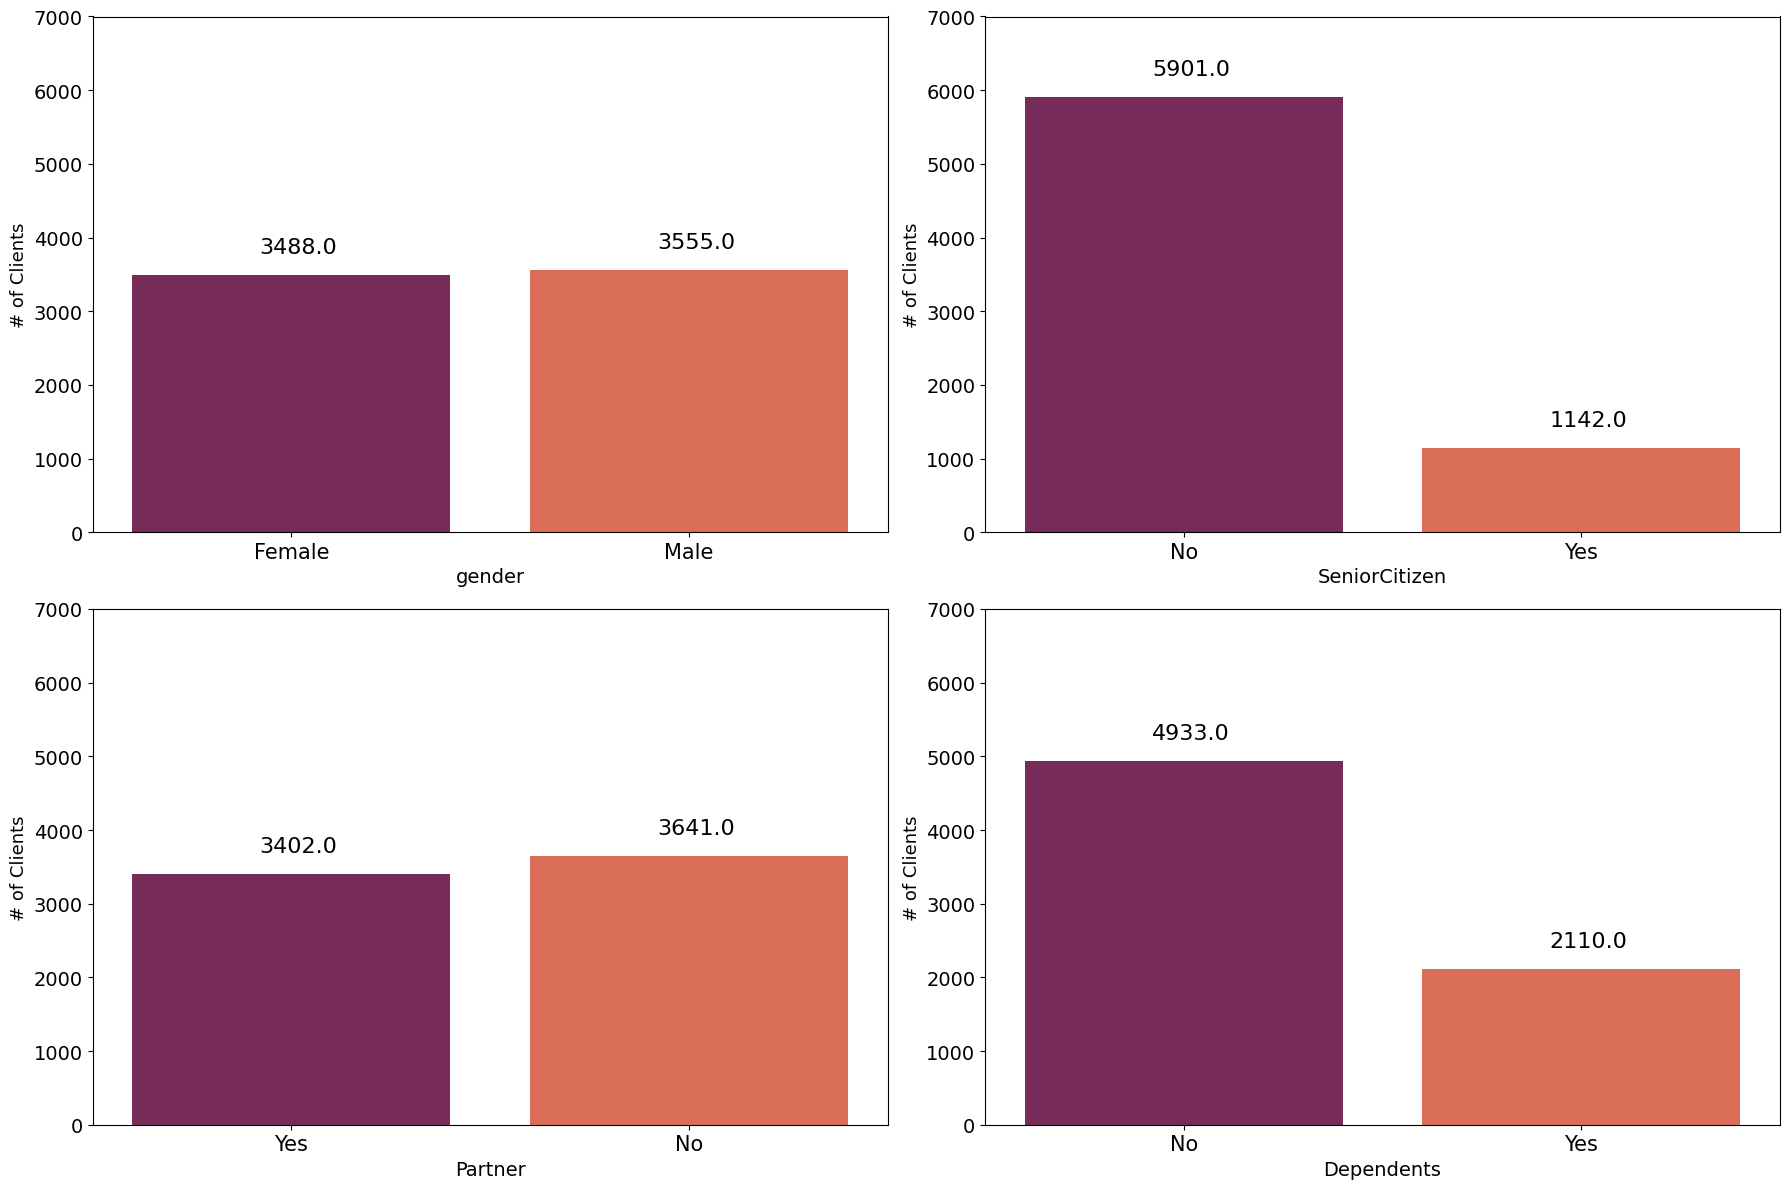

In [35]:
plt.figure(figsize=(18,12))
for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

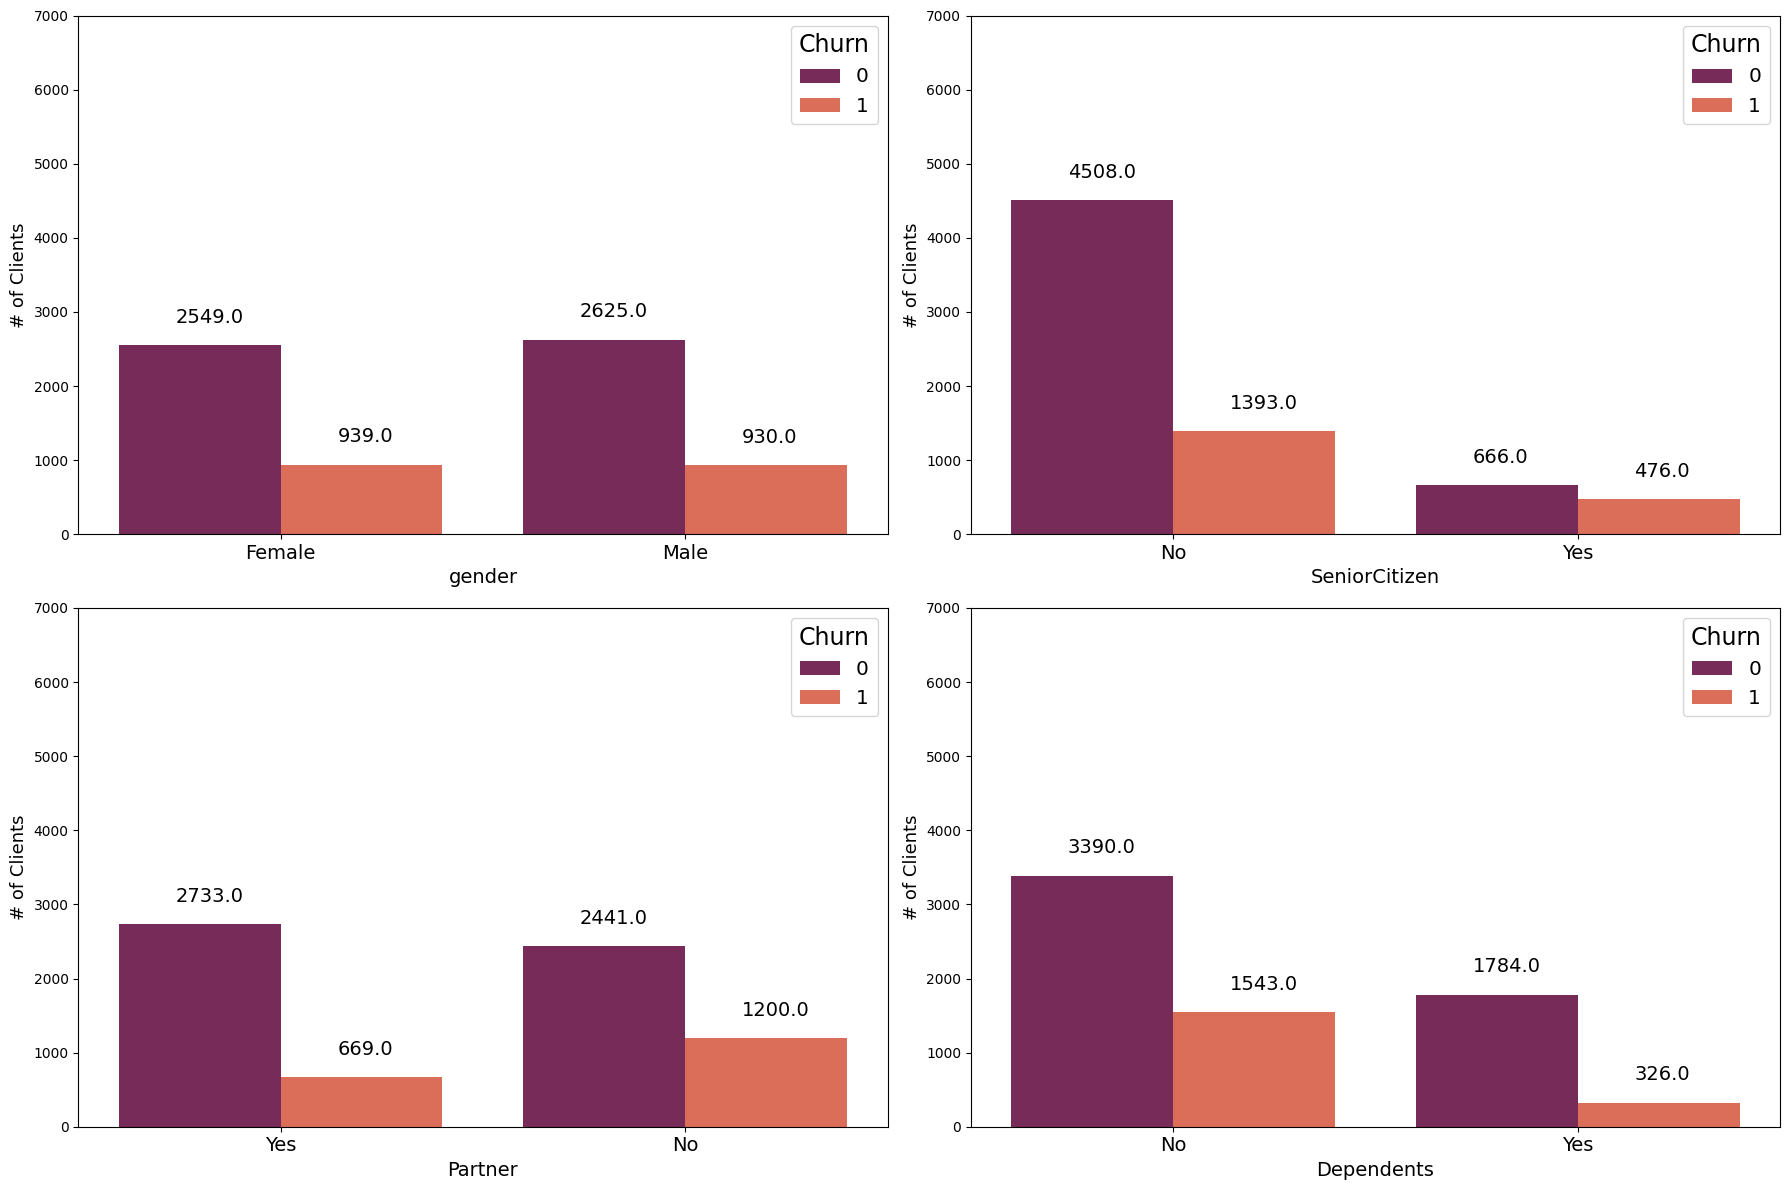

In [36]:
plt.figure(figsize=(18,12))
for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

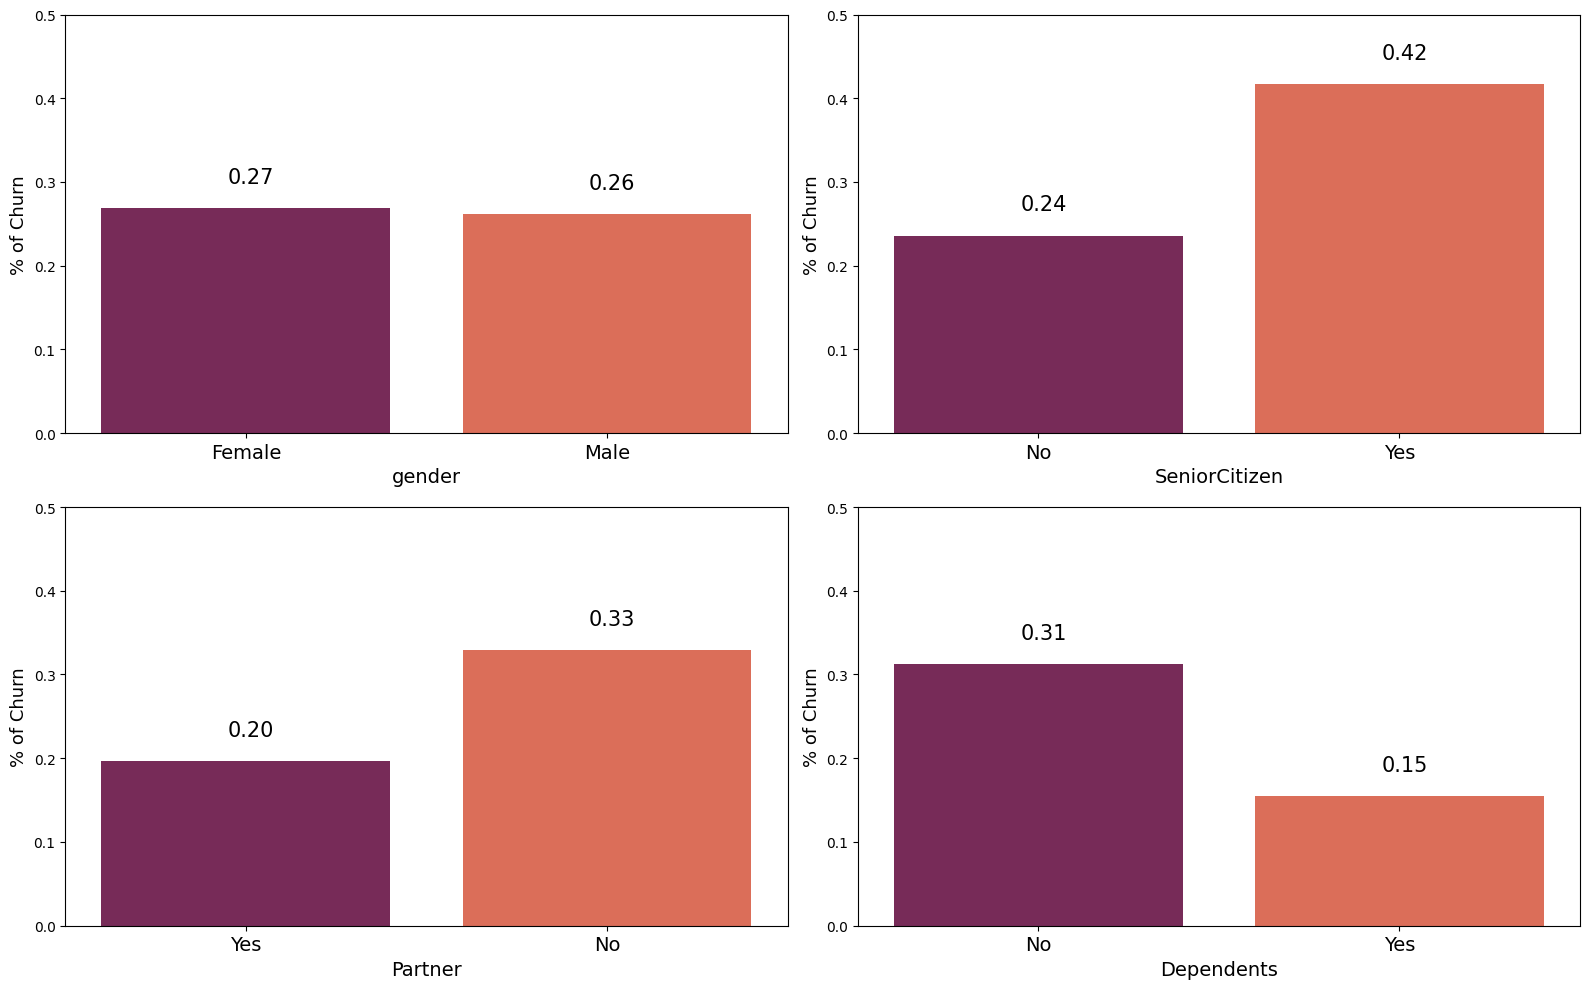

In [37]:
plt.figure(figsize=(16,10))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

In [38]:
df.groupby(['Partner'])['Dependents'].value_counts()

Partner  Dependents
No       No            3280
         Yes            361
Yes      Yes           1749
         No            1653
Name: count, dtype: int64

In [39]:
df.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          0        0.657622
                     1        0.342378
         Yes         0        0.786704
                     1        0.213296
Yes      No          0        0.745917
                     1        0.254083
         Yes         0        0.857633
                     1        0.142367
Name: proportion, dtype: float64

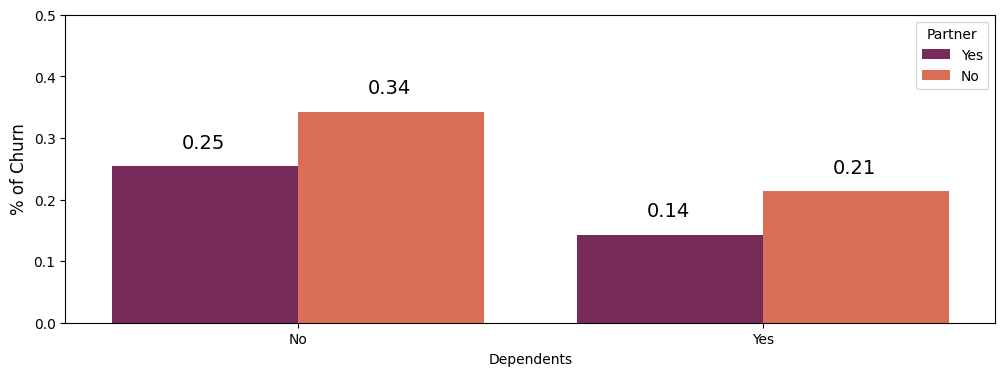

In [41]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

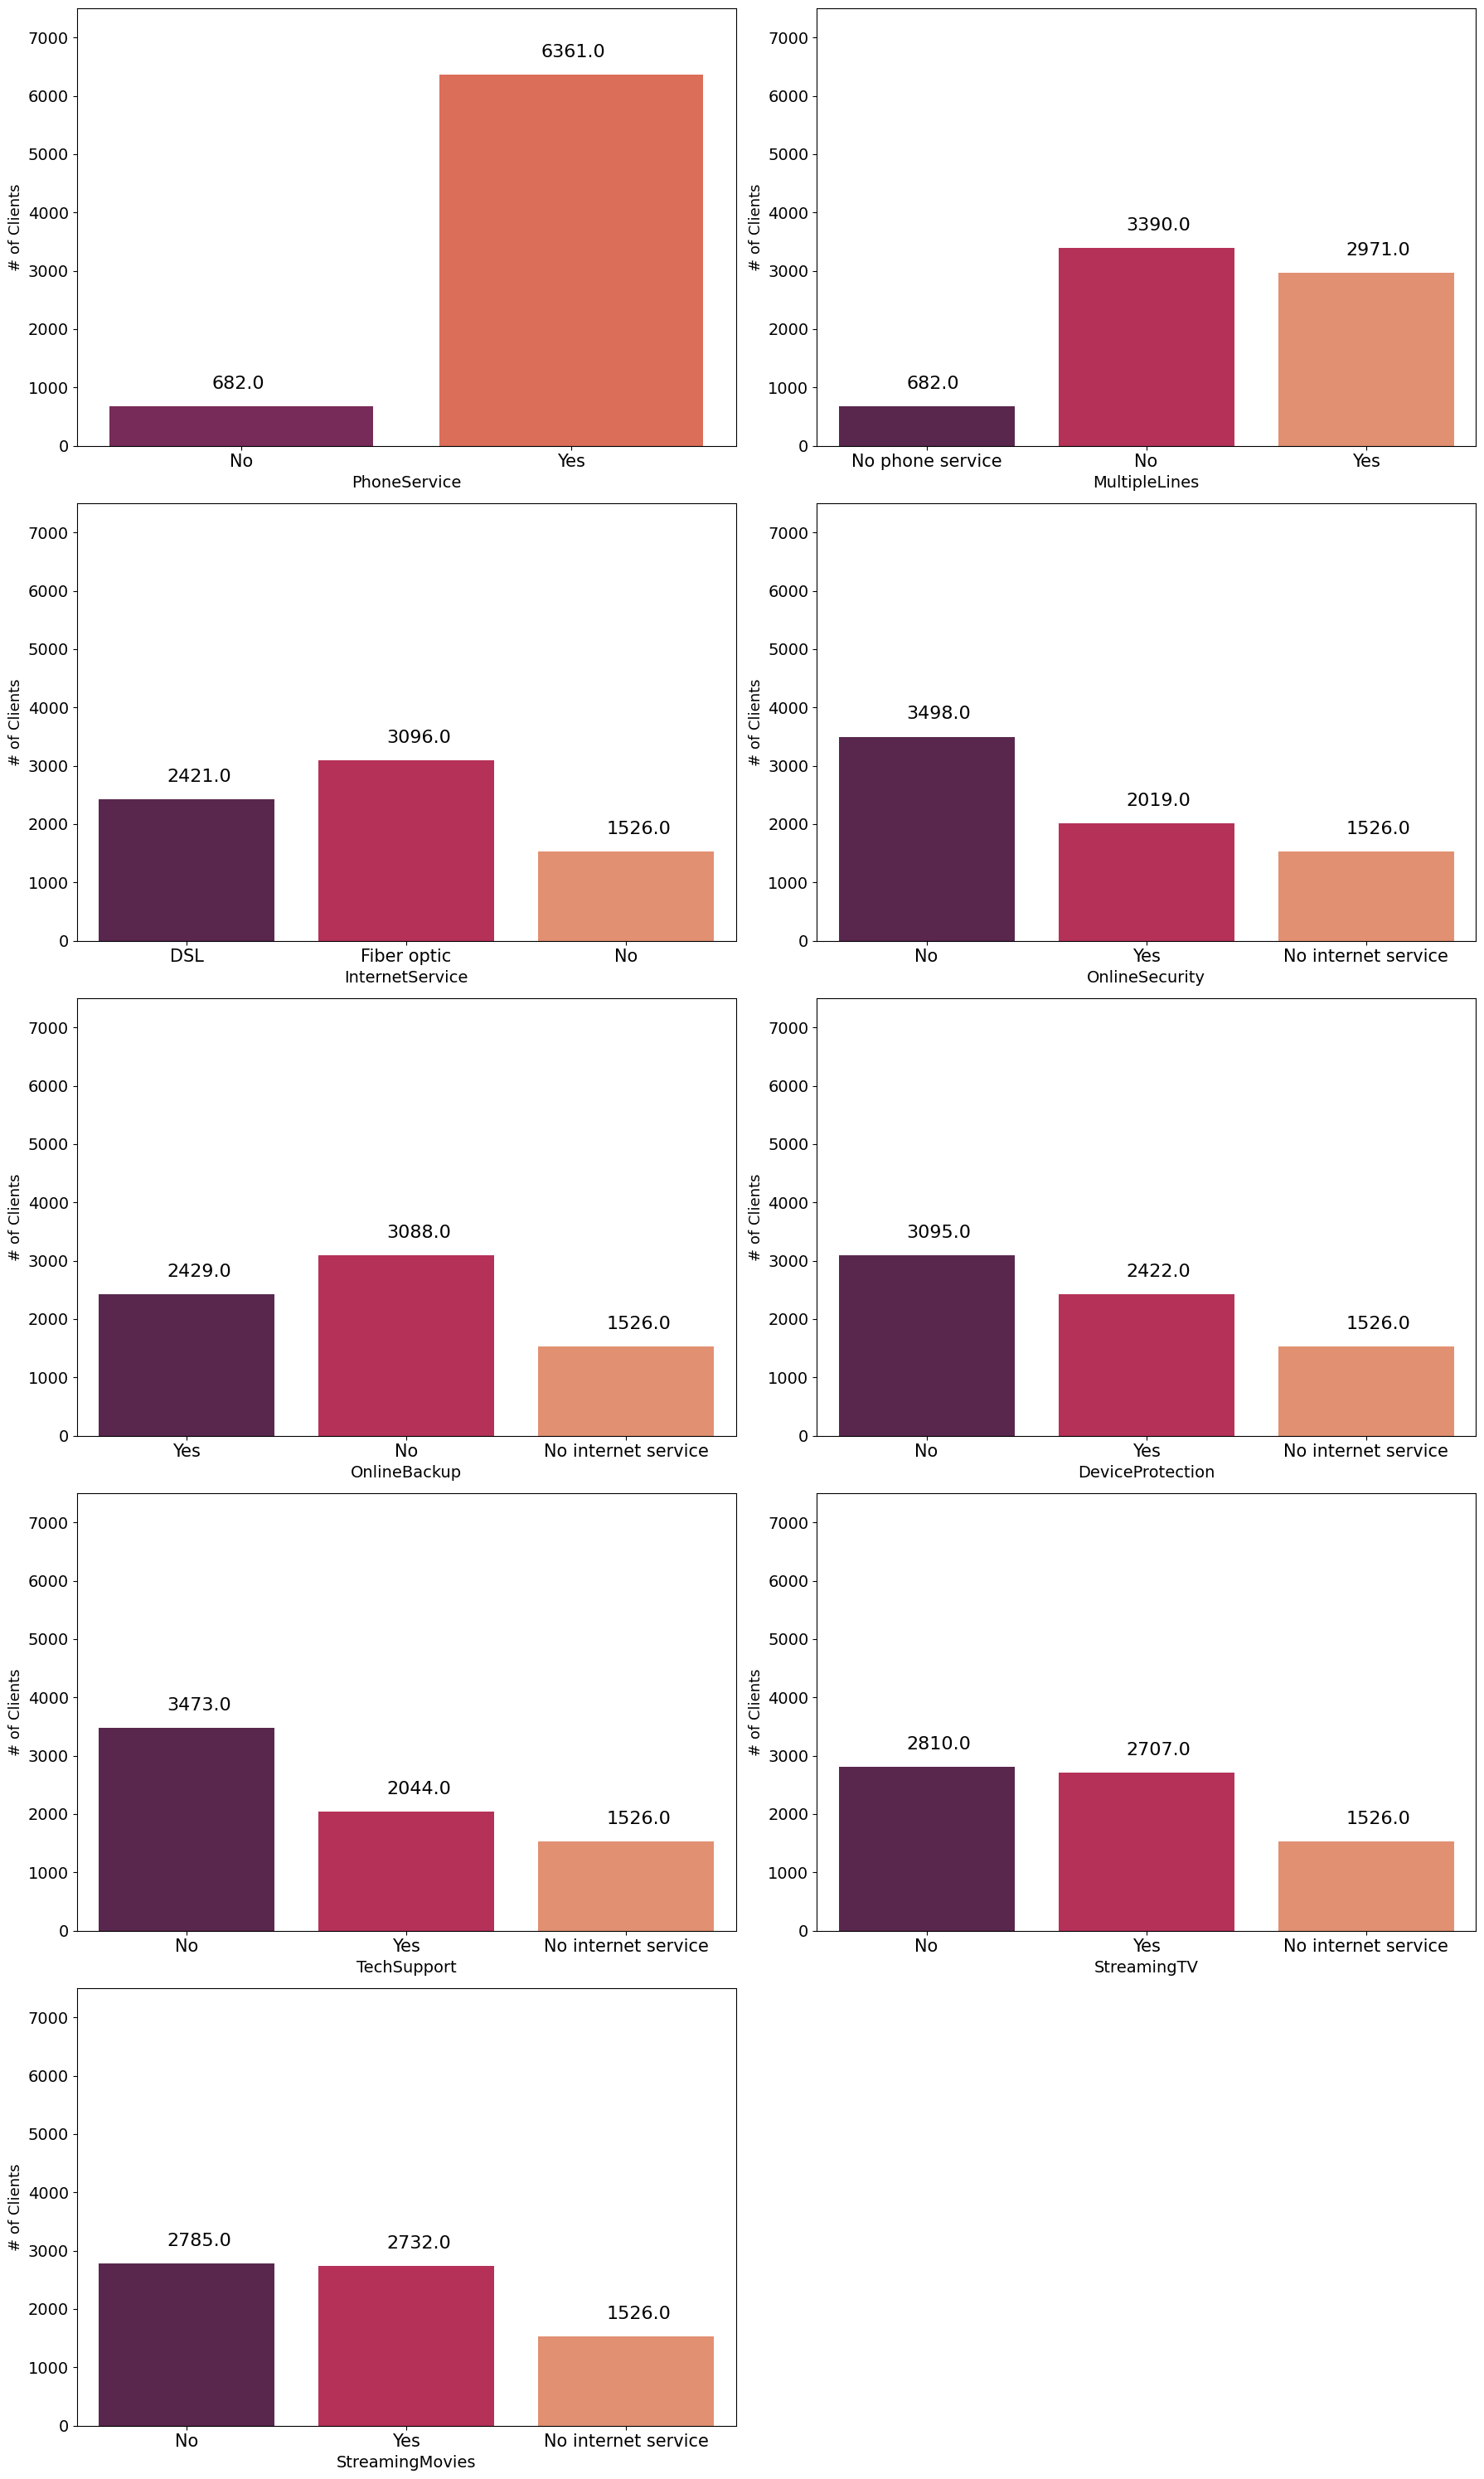

In [42]:
plt.figure(figsize=(18,30))
for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)

plt.tight_layout()
plt.show()

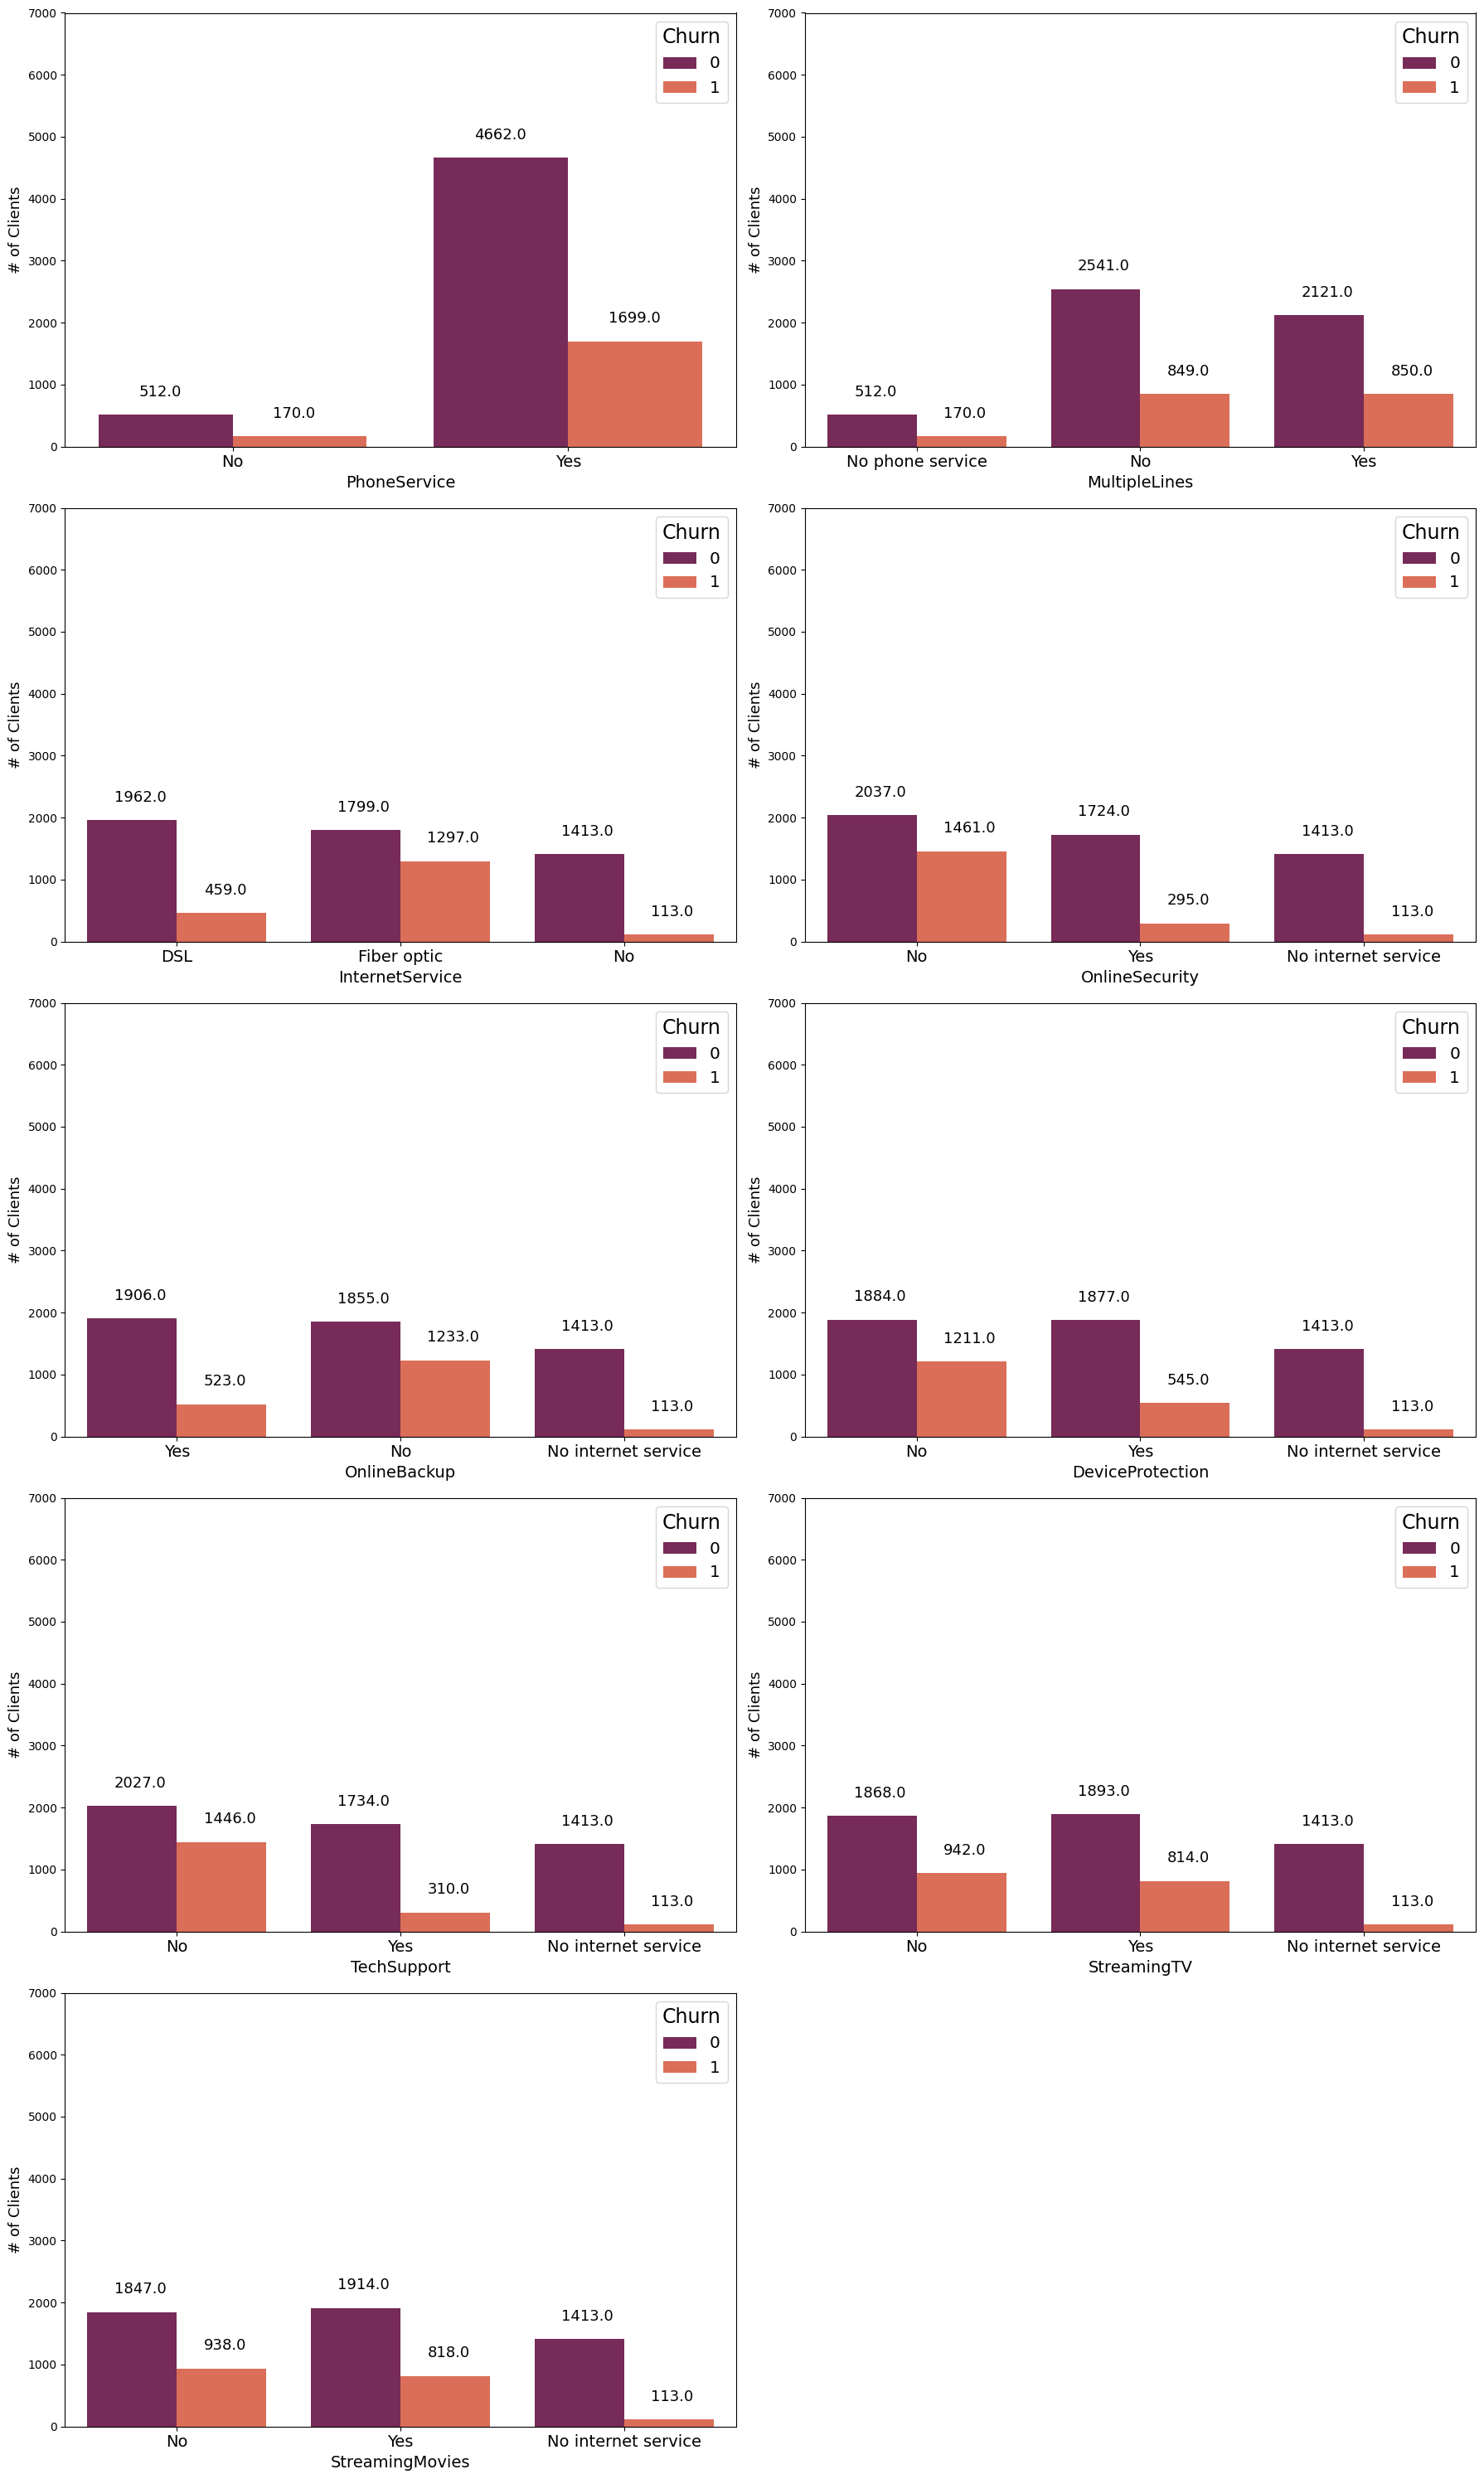

In [43]:
plt.figure(figsize=(18,30))
for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()
plt.show()

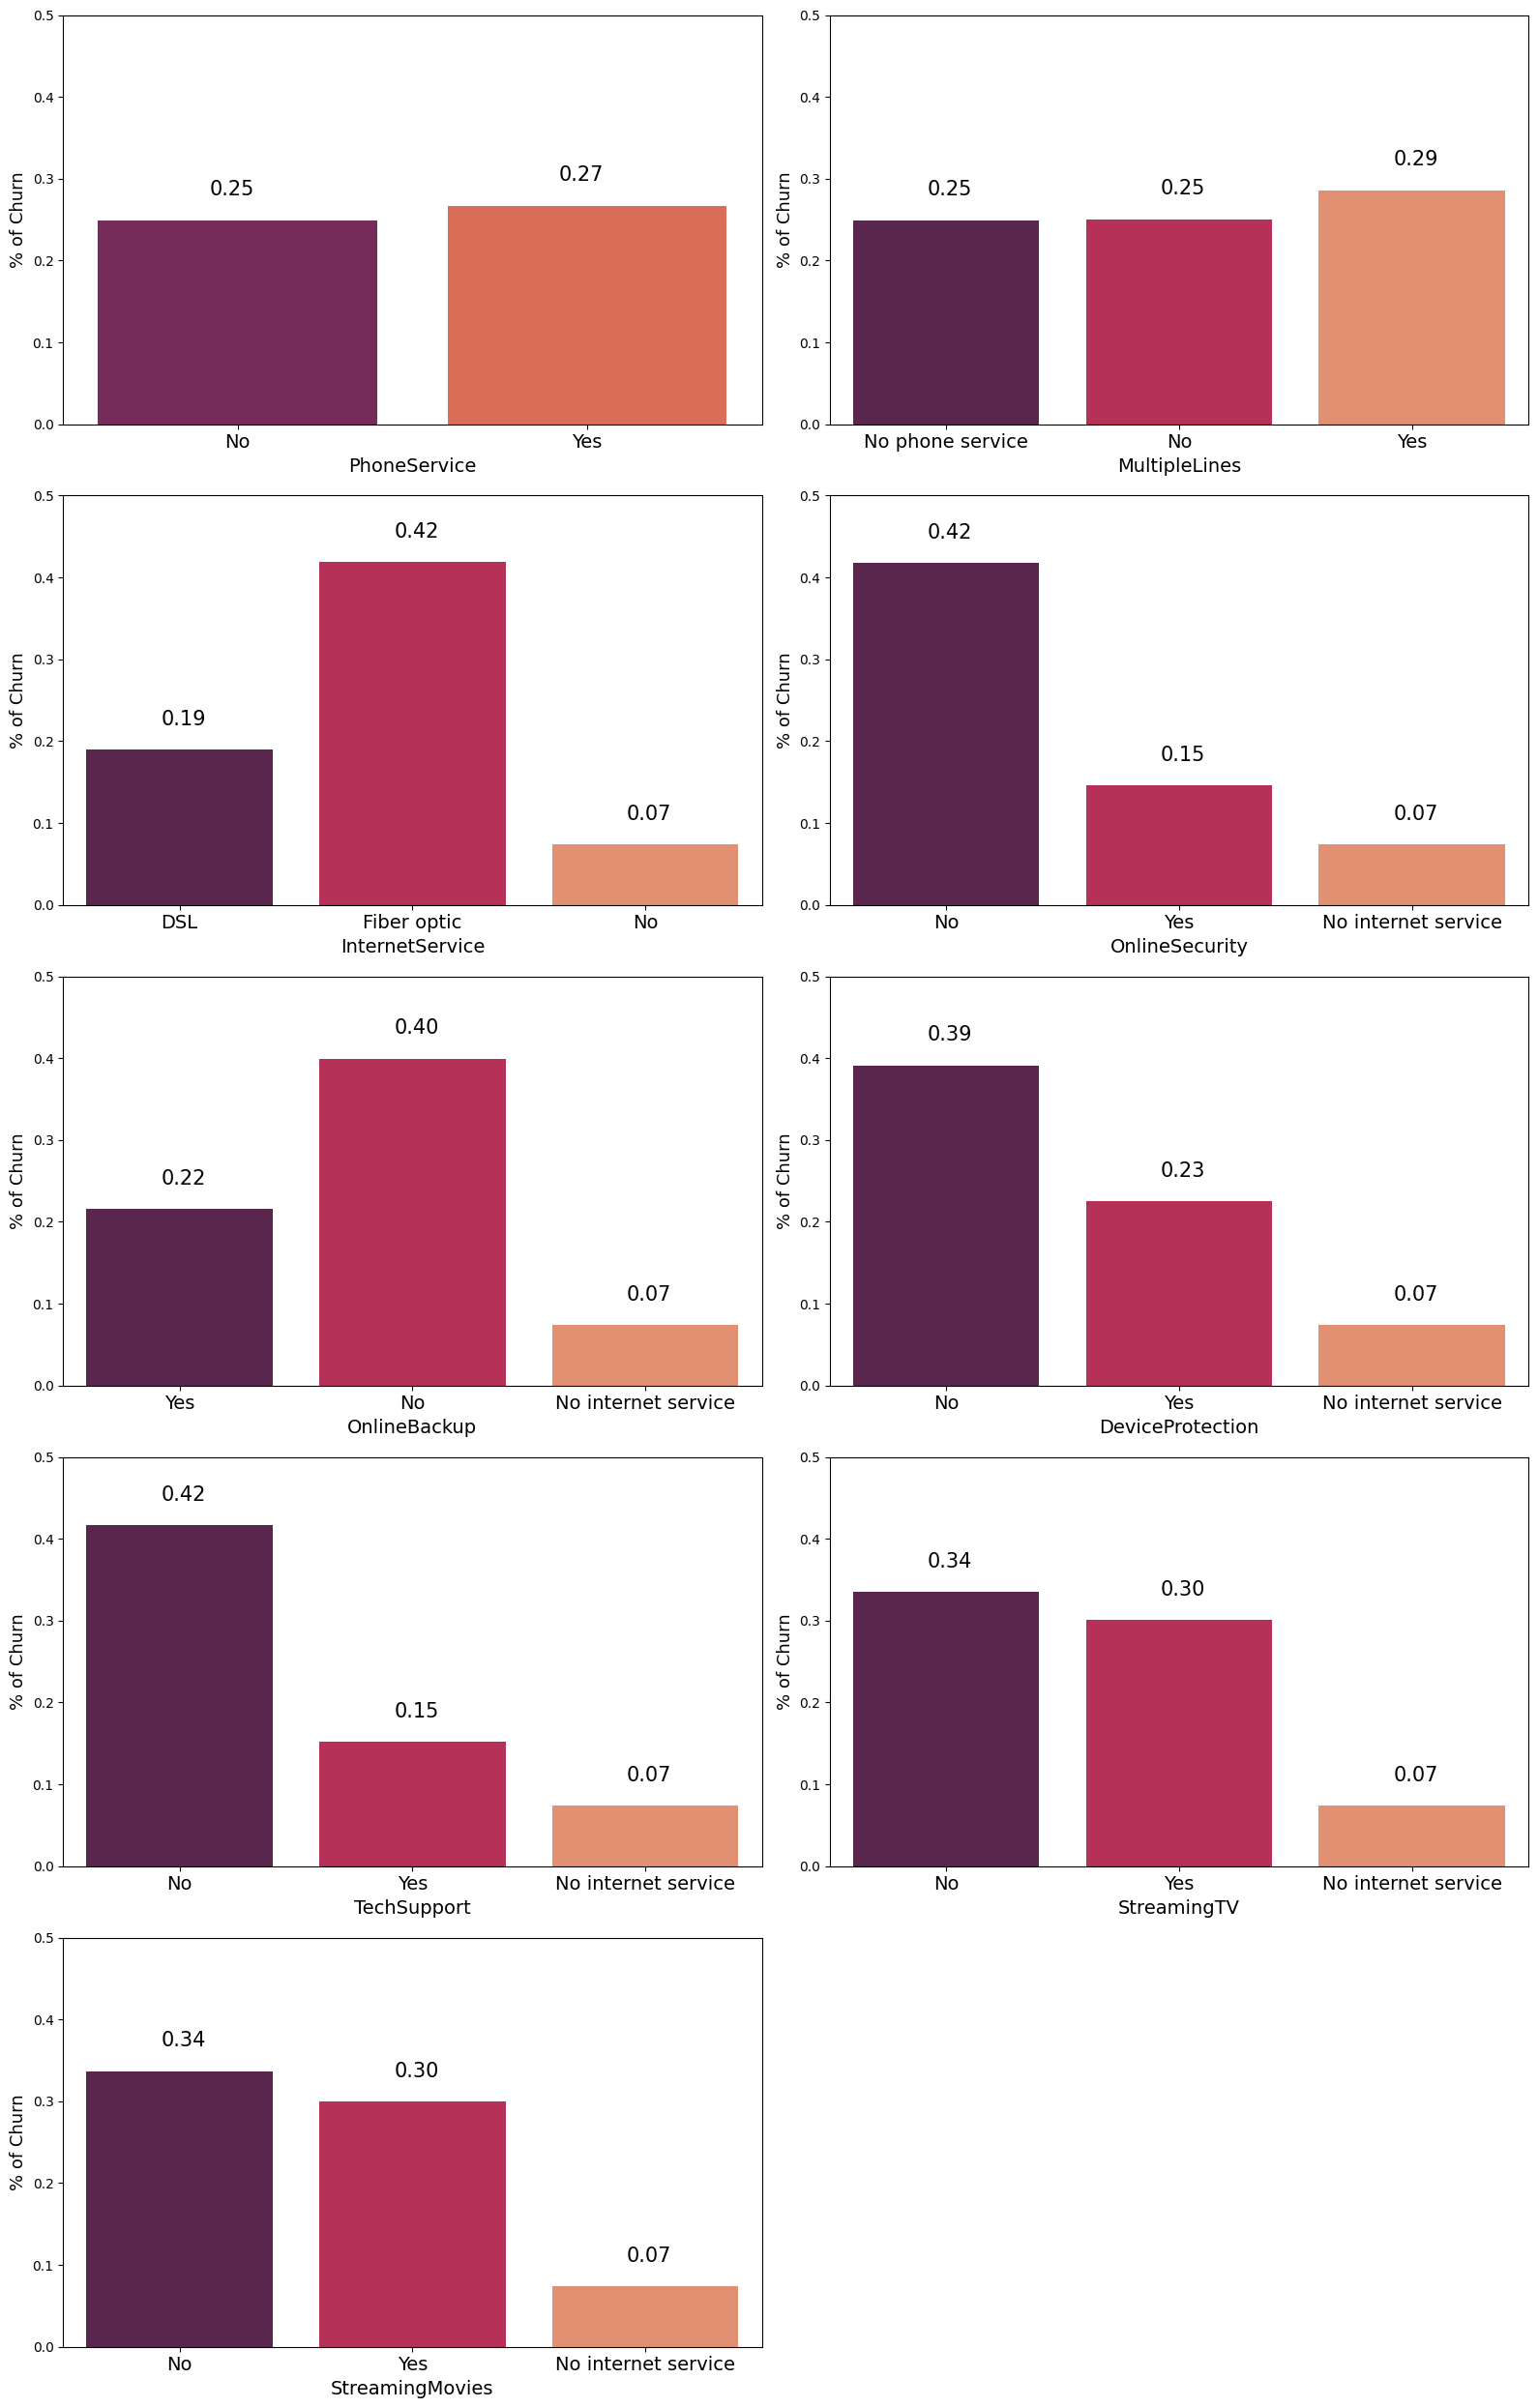

In [44]:
plt.figure(figsize=(16,25))
for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

In [45]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.079194
DSL            58.102169
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64

In [46]:
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
No internet service    21.079194
No                     74.586683
Yes                    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.079194
No                     75.693067
Yes                    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.079194
No                   No                     74.188367
Yes                  No                     75.692011
No                   Yes                    79.758148
Yes                  Yes                    81.472930
Name: MonthlyCharges, dtype: float64


In [47]:
print(df.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts(), '\n')

TechSupport          OnlineSecurity     
No                   No                     2553
                     Yes                     920
No internet service  No internet service    1526
Yes                  Yes                    1099
                     No                      945
Name: count, dtype: int64 



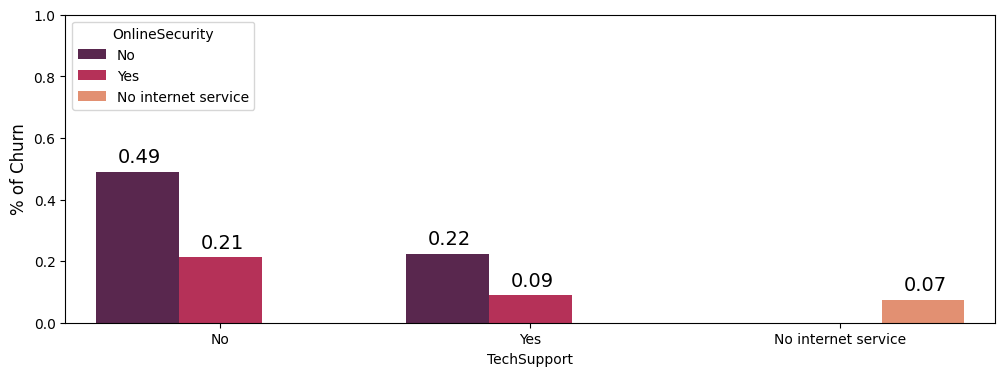

In [48]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,1.0)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.070, p.get_height()+0.03),fontsize=14)

plt.show()

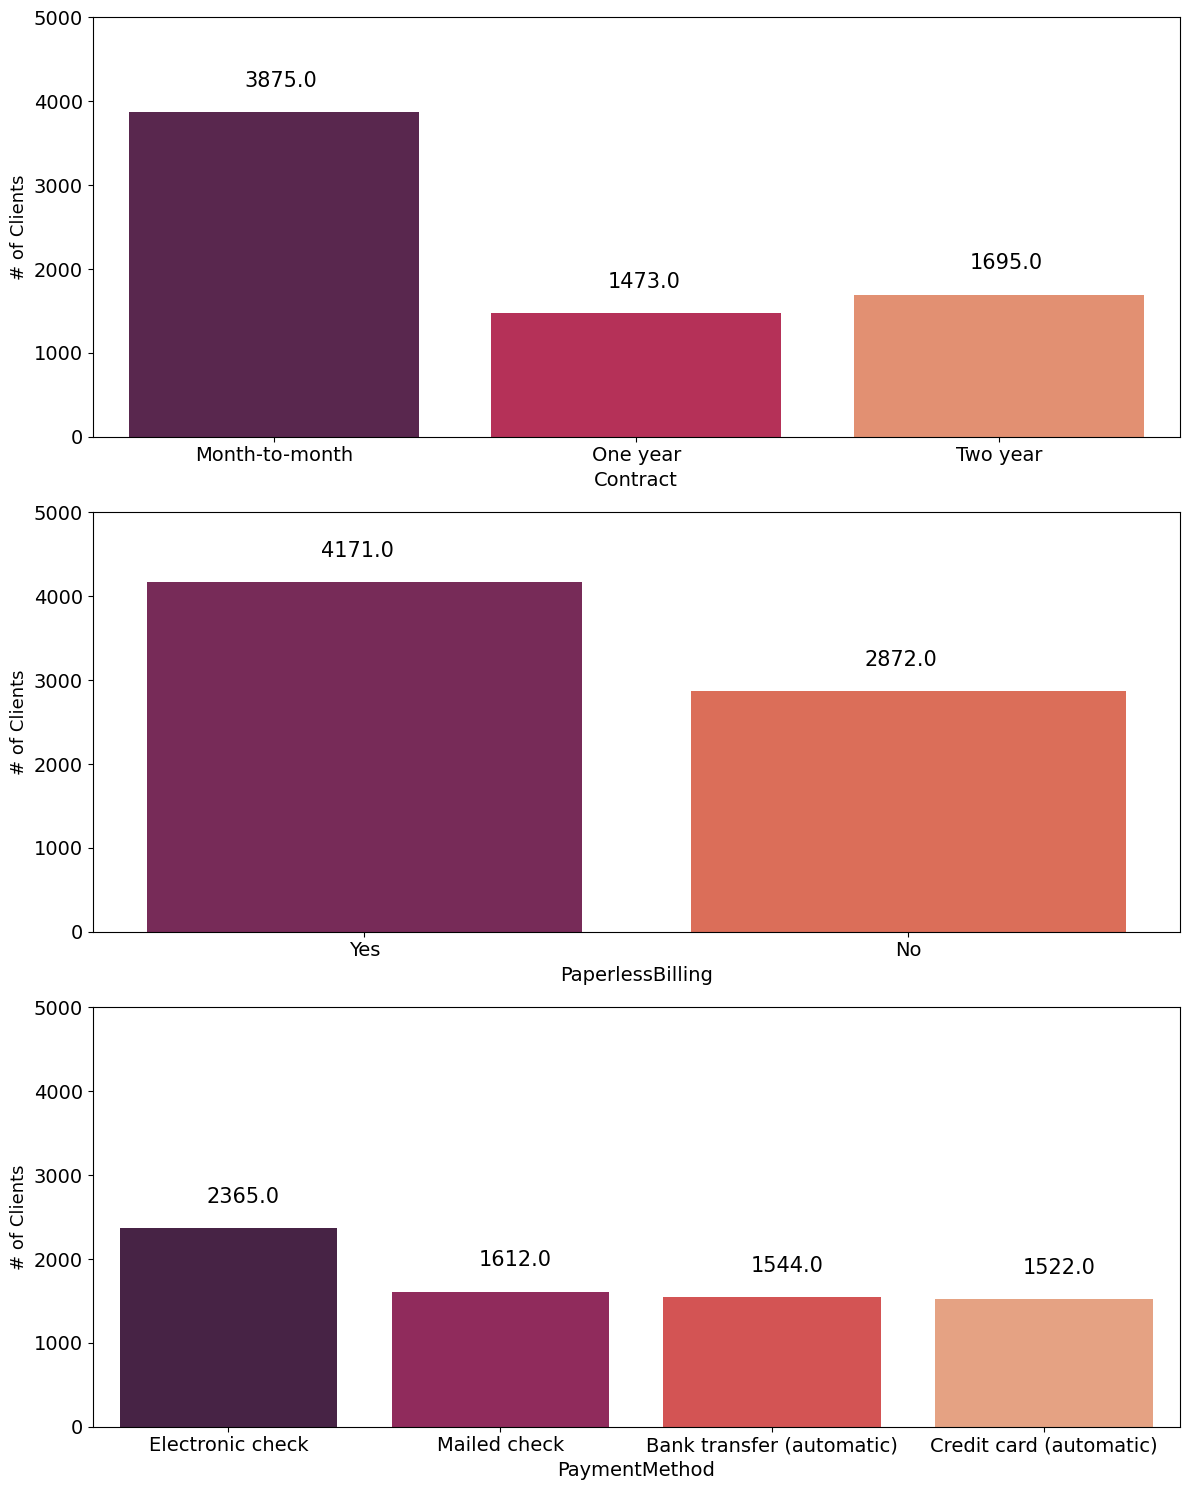

In [49]:
plt.figure(figsize=(12,15))
for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 15)

plt.tight_layout()
plt.show()

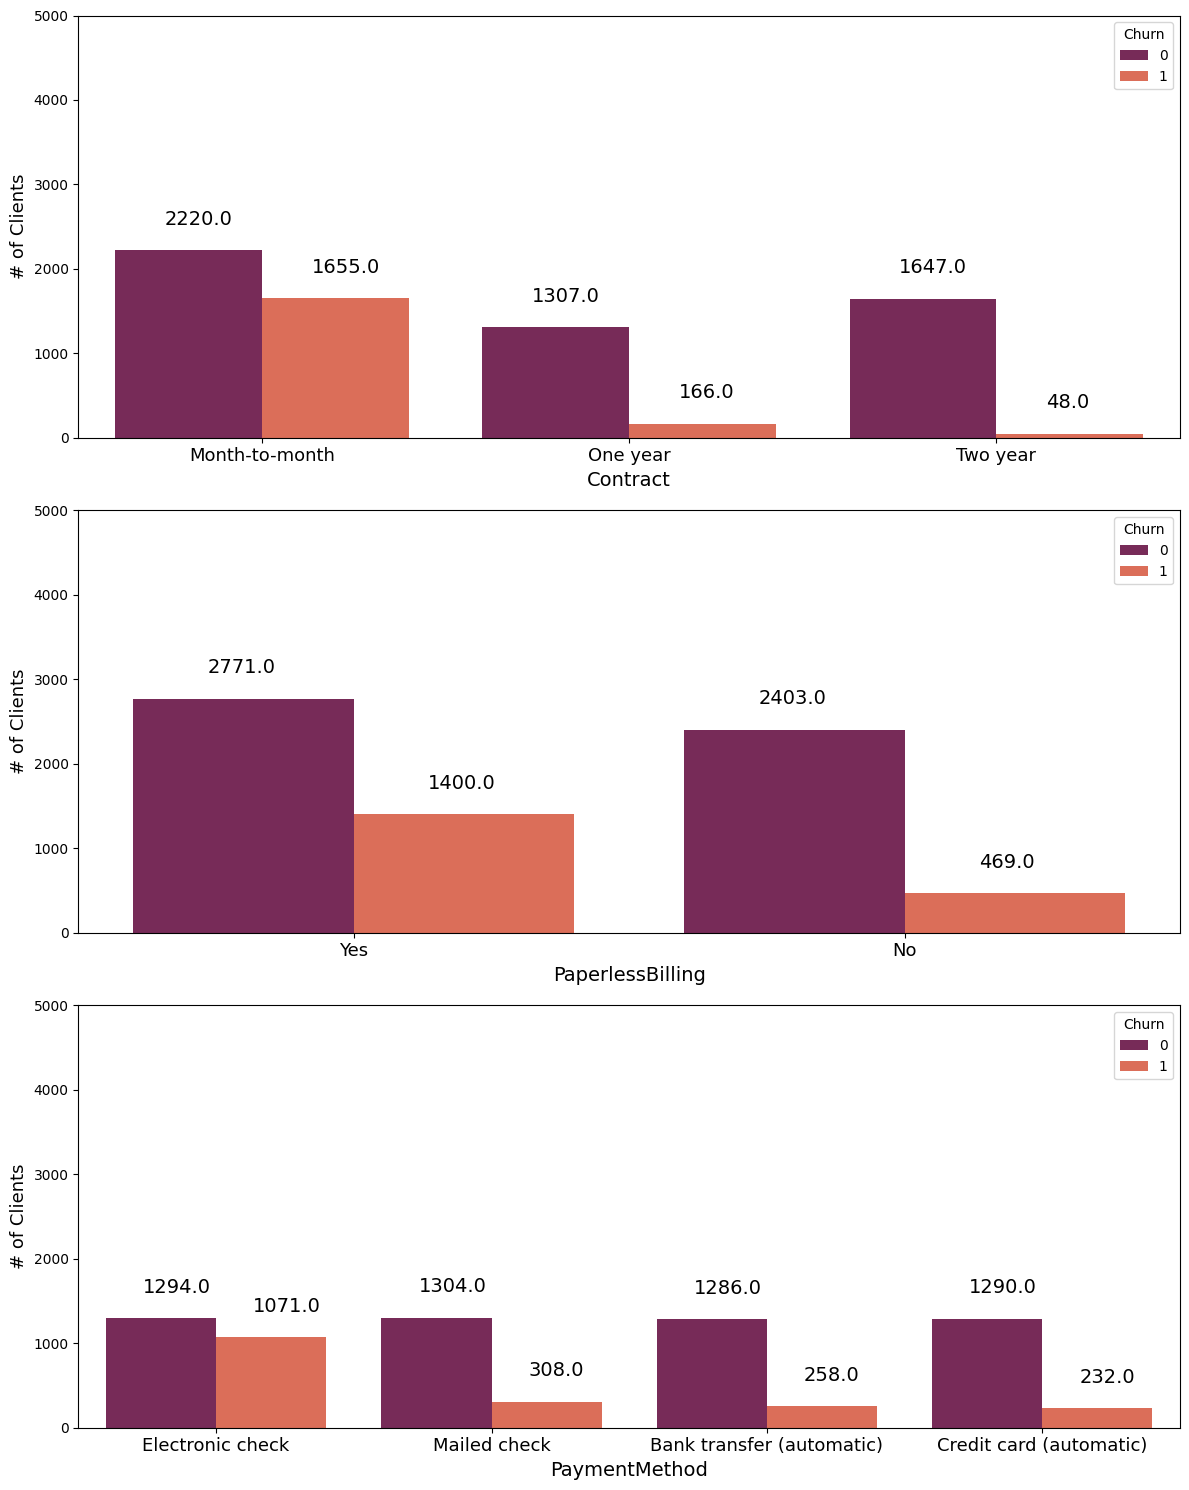

In [50]:
plt.figure(figsize=(12,15))
for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()
plt.show()

In [51]:
print(df.groupby(by=['Contract'])['PaperlessBilling'].value_counts(normalize = True),' \n')
print(df.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

Contract        PaperlessBilling
Month-to-month  Yes                 0.667355
                No                  0.332645
One year        Yes                 0.543109
                No                  0.456891
Two year        No                  0.536873
                Yes                 0.463127
Name: proportion, dtype: float64  

Contract        PaymentMethod            
Month-to-month  Electronic check             0.477419
                Mailed check                 0.230452
                Bank transfer (automatic)    0.152000
                Credit card (automatic)      0.140129
One year        Credit card (automatic)      0.270197
                Bank transfer (automatic)    0.265445
                Electronic check             0.235574
                Mailed check                 0.228785
Two year        Credit card (automatic)      0.342773
                Bank transfer (automatic)    0.332743
                Mailed check                 0.225369
                Electroni

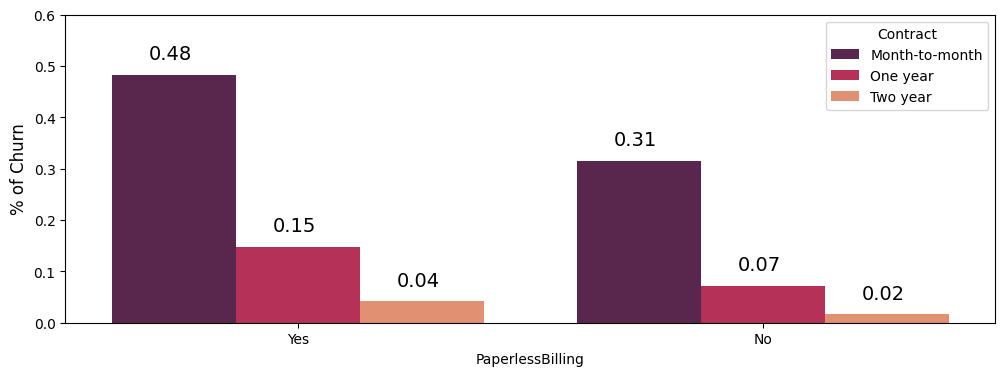

In [52]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "PaperlessBilling", y = "Churn", hue = "Contract", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.08, p.get_height()+0.03),fontsize=14)
plt.show()

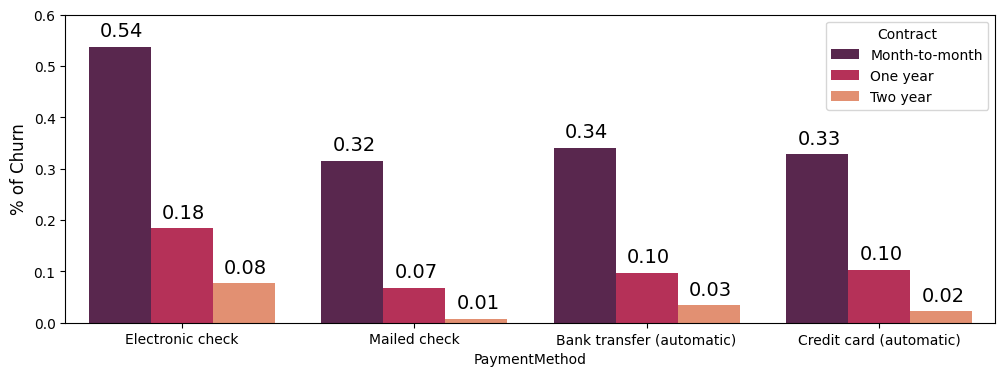

In [53]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "PaymentMethod", y = "Churn", hue = "Contract", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.020),fontsize=14)

plt.show()

In [54]:
print(df.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(df.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaperlessBilling
DSL              Yes                 0.549360
                 No                  0.450640
Fiber optic      Yes                 0.773579
                 No                  0.226421
No               No                  0.707733
                 Yes                 0.292267
Name: proportion, dtype: float64 

InternetService  PaymentMethod            
DSL              Electronic check             0.267658
                 Mailed check                 0.253201
                 Credit card (automatic)      0.245353
                 Bank transfer (automatic)    0.233788
Fiber optic      Electronic check             0.515181
                 Bank transfer (automatic)    0.208656
                 Credit card (automatic)      0.192829
                 Mailed check                 0.083333
No               Mailed check                 0.485583
                 Bank transfer (automatic)    0.217562
                 Credit card (automatic)      0.216907
       

What stands out here in our grouping operations:
Customers with Internet Service = ‘No’: Less than 30% receive paperless bills and only 8% pay them with electronic check;
Customers with Internet Service = ‘Fiber Optic’: 77% receive paperless bills and more them 51% pay them with electronic check.

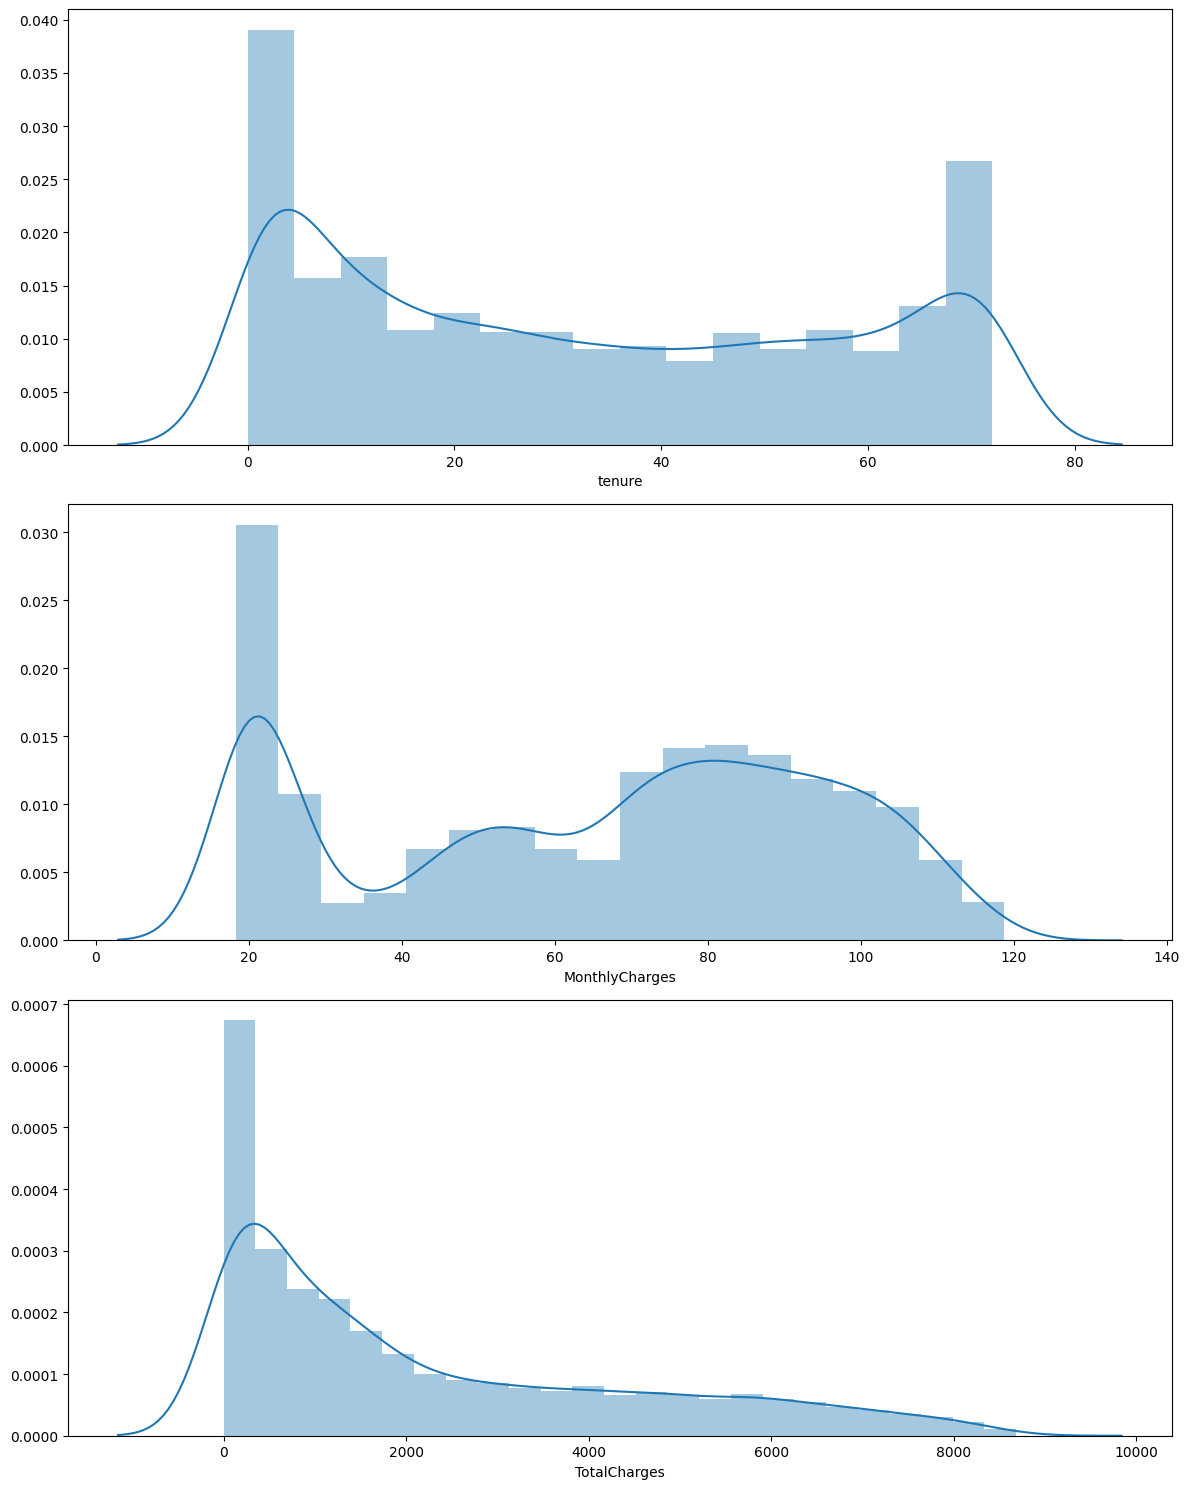

In [56]:
plt.figure(figsize=(12,15))
for i,col in enumerate(num_accinfo_features):    
    plt.subplot(3,1,i + 1)
    sns.distplot(df.loc[:,col])
    #plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

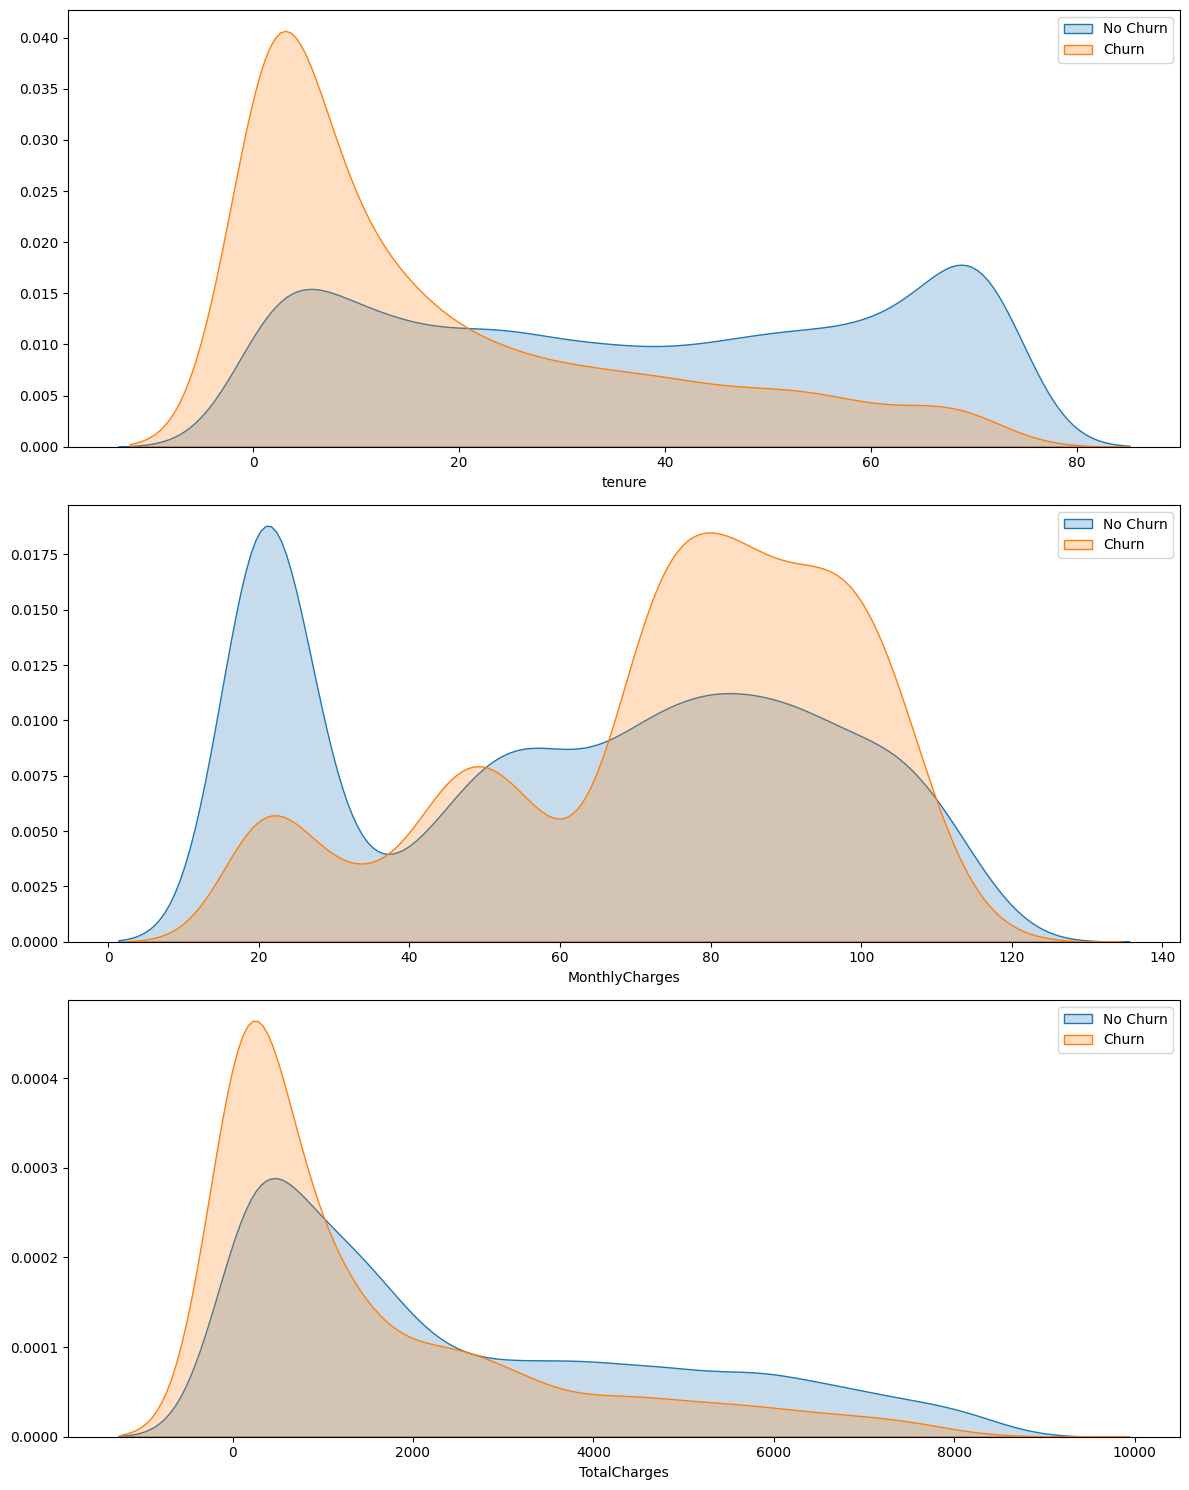

In [57]:
plt.figure(figsize=(12,15))
for i,col in enumerate(num_accinfo_features):    
    plt.subplot(3,1,i + 1)    
    sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

What I can observe for each feature:

Tenure: High concentration of churned customer in the first months.
Monthly Charges: High concentration of churned customer in higher values (around 60 and beyond)
Total Charges: Somewhat similar distributions, but the ‘No churn’ distribution have lower values.

In [58]:
print(df.groupby(by=['Churn'])['tenure'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

Churn
1    17.979133
0    37.569965
Name: tenure, dtype: float64 

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
1    1531.796094
0    2549.911442
Name: TotalCharges, dtype: float64


In [59]:
df['tenure_bin'] = pd.cut(df['tenure'],[-1,12,24,36,48,60,100])
df['tenure_bin'].value_counts(sort = False)

tenure_bin
(-1, 12]     2186
(12, 24]     1024
(24, 36]      832
(36, 48]      762
(48, 60]      832
(60, 100]    1407
Name: count, dtype: int64

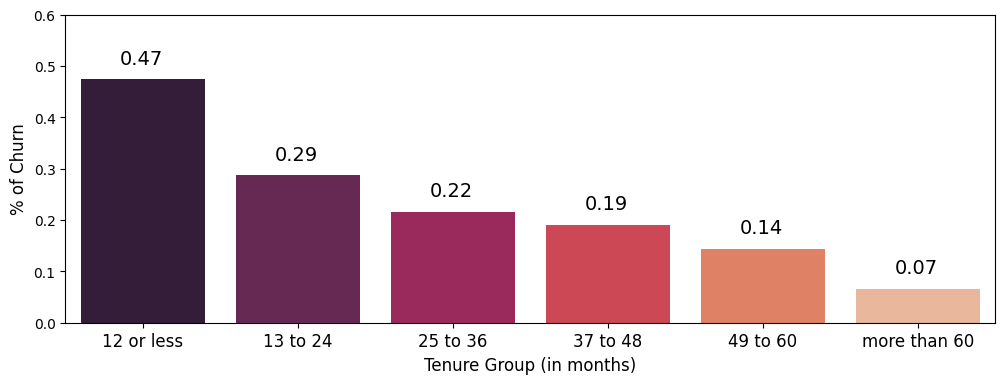

In [61]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure Group (in months)", fontsize= 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

In [62]:
X = df.copy().drop('Churn', axis = 1)
Y = df['Churn'].copy()

In [63]:
X = X.drop(['customerID', 'tenure_bin'], axis = 1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [65]:
gender_map = {'Female': 0, 'Male': 1}
yes_or_no_map = {'No': 0, 'Yes': 1} #seniorcitizen, partner, dependents, phoneservice, paperlessbilling
multiplelines_map = {'No phone service': -1, 'No': 0, 'Yes': 1}
internetservice_map = {'No': -1, 'DSL': 0, 'Fiber optic': 1}
add_netservices_map = {'No internet service': -1, 'No': 0, 'Yes': 1} #onlinesecurity, onlinebackup, deviceprotection,techsupport,streaming services
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
paymentmethod_map = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}


X['gender'] = X['gender'].map(gender_map).astype('int')
X['Partner'] = X['Partner'].map(yes_or_no_map).astype('int')
X['SeniorCitizen'] = X['SeniorCitizen'].map(yes_or_no_map).astype('int')
X['Dependents'] = X['Dependents'].map(yes_or_no_map).astype('int')
X['PhoneService'] = X['PhoneService'].map(yes_or_no_map).astype('int')
X['MultipleLines'] = X['MultipleLines'].map(multiplelines_map).astype('int')
X['InternetService'] = X['InternetService'].map(internetservice_map).astype('int')
X['OnlineSecurity'] = X['OnlineSecurity'].map(add_netservices_map).astype('int')
X['OnlineBackup'] = X['OnlineBackup'].map(add_netservices_map).astype('int')
X['DeviceProtection'] = X['DeviceProtection'].map(add_netservices_map).astype('int')
X['TechSupport'] = X['TechSupport'].map(add_netservices_map).astype('int')
X['StreamingTV'] = X['StreamingTV'].map(add_netservices_map).astype('int')
X['StreamingMovies'] = X['StreamingMovies'].map(add_netservices_map).astype('int')
X['Contract'] = X['Contract'].map(contract_map).astype('int')
X['PaperlessBilling'] = X['PaperlessBilling'].map(yes_or_no_map).astype('int')
X['PaymentMethod'] = X['PaymentMethod'].map(paymentmethod_map).astype('int')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Machine Learning Model

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

In [67]:
num_features = num_accinfo_features

cat_3p_features = []
for col in X.columns:
    if (X[col].nunique() > 2) & (X[col].nunique() < 5):  #less than 5 to exclude the numerical features
        cat_3p_features.append(col)
print('Numerical features: ', num_features, '\n')        
print('Nominal with 3 or more categories: ', cat_3p_features)

Numerical features:  ['tenure', 'MonthlyCharges', 'TotalCharges'] 

Nominal with 3 or more categories:  ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [68]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_3p_features)      
    ], remainder='passthrough')

In [69]:
lr_pipe = Pipeline([('Transformers', preprocessor)
                        ,('LR',  LogisticRegression(random_state = 42, max_iter = 1000))])

In [70]:
def cv_function (model, param, list):
    
    rp_st_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 42)
    search_model = model
    print ('Hyperparameter: ', param)
    
    for i in list:
        param_dict = {param : i}
        search_model.set_params(**param_dict)    
        cv_score = cross_val_score(search_model, X_train, Y_train, cv=rp_st_kfold, scoring='roc_auc')
        print("Parameter: {0:0.2f} - AUC(SD): {1:0.4f} ({2:0.4f})". format(i, cv_score.mean(), cv_score.std()))
        
params_lr_list = [0.01,0.1,0.2,0.3,0.5,0.7,1,2,3,5]
param_lr = 'LR__C'
cv_function(lr_pipe, param_lr, params_lr_list)

Hyperparameter:  LR__C
Parameter: 0.01 - AUC(SD): 0.8435 (0.0142)
Parameter: 0.10 - AUC(SD): 0.8456 (0.0144)
Parameter: 0.20 - AUC(SD): 0.8459 (0.0144)
Parameter: 0.30 - AUC(SD): 0.8460 (0.0144)
Parameter: 0.50 - AUC(SD): 0.8461 (0.0144)
Parameter: 0.70 - AUC(SD): 0.8462 (0.0144)
Parameter: 1.00 - AUC(SD): 0.8463 (0.0144)
Parameter: 2.00 - AUC(SD): 0.8463 (0.0144)
Parameter: 3.00 - AUC(SD): 0.8464 (0.0143)
Parameter: 5.00 - AUC(SD): 0.8464 (0.0144)


In [71]:
lr_param = {'LR__C': 3.0}
lr_pipe.set_params(**lr_param) 
lr_pipe

Pipeline(steps=[('Transformers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('LR',
                 LogisticRegression(C=3.0, max_iter=1000, random_state=42))])

In [72]:
lr_pipe.fit(X_train, Y_train)
pred_lr = lr_pipe.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_lr))
print("Test F1 Score: ",metrics.f1_score(Y_test, pred_lr))

Test Accuracy:  0.8069552874378992
Test F1 Score:  0.6080691642651298


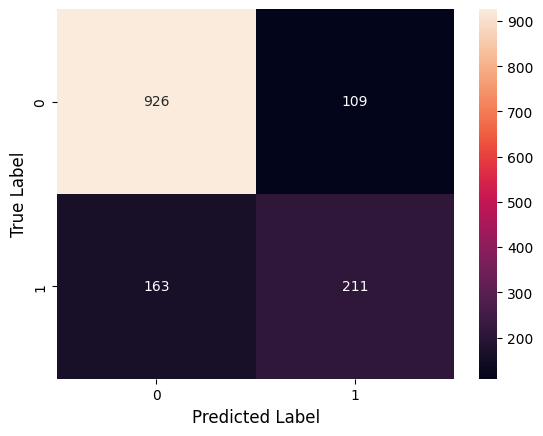

In [73]:
lr_confusion_matrix = metrics.confusion_matrix(Y_test, pred_lr)
sns.heatmap(lr_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [74]:
print(metrics.classification_report(Y_test, pred_lr, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



ROC_AUC:  0.8417473972461184


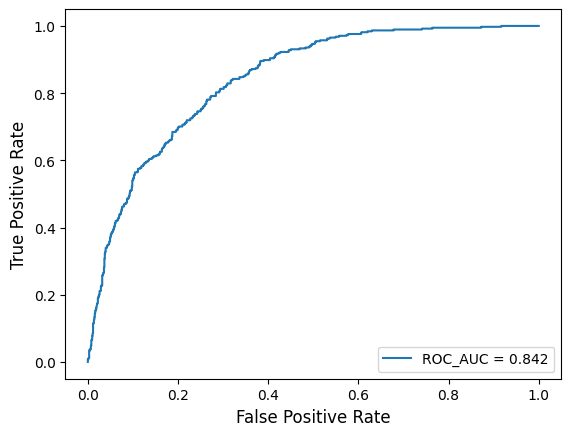

In [76]:
lr_pred_proba = lr_pipe.predict_proba(X_test)[:,1]
lr_roc_auc = metrics.roc_auc_score(Y_test, lr_pred_proba)
print('ROC_AUC: ', lr_roc_auc)

lr_fpr, lr_tpr, thresholds = metrics.roc_curve(Y_test, lr_pred_proba)

plt.plot(lr_fpr,lr_tpr, label = 'ROC_AUC = %0.3f' % lr_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [77]:
rf_model = RandomForestClassifier(random_state = 42)

params_rf_list = [100,150,200,250,300,400,500]
param_rf = 'n_estimators'
cv_function(rf_model, param_rf, params_rf_list)

Hyperparameter:  n_estimators
Parameter: 100.00 - AUC(SD): 0.8262 (0.0155)
Parameter: 150.00 - AUC(SD): 0.8276 (0.0160)
Parameter: 200.00 - AUC(SD): 0.8284 (0.0161)
Parameter: 250.00 - AUC(SD): 0.8288 (0.0161)
Parameter: 300.00 - AUC(SD): 0.8293 (0.0161)
Parameter: 400.00 - AUC(SD): 0.8295 (0.0162)
Parameter: 500.00 - AUC(SD): 0.8297 (0.0162)


In [78]:
rf_param = {'n_estimators': 500}
rf_model.set_params(**rf_param) 
rf_model

RandomForestClassifier(n_estimators=500, random_state=42)

In [79]:
rf_model.fit(X_train, Y_train)
pred_rf = rf_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_rf))
print("Test F1 Score: ",metrics.f1_score(Y_test, pred_rf))

Test Accuracy:  0.7877927608232789
Test F1 Score:  0.5543964232488823


In [80]:
print(metrics.classification_report(Y_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



ROC_AUC:  0.8251013976077916


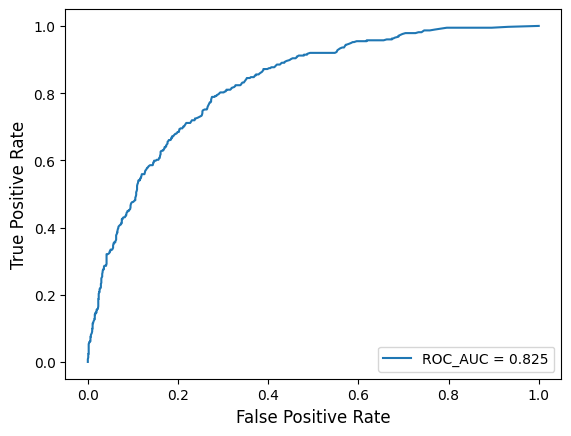

In [81]:
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(Y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [82]:
rf_pipe = Pipeline([('Transformers', preprocessor)
                        ,('RF',  RandomForestClassifier(n_estimators = 500, random_state = 42))])

rf_pipe.fit(X_train, Y_train)
pred_rf_pipe = rf_pipe.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_rf_pipe))
print("Test F1 Score: ",metrics.f1_score(Y_test, pred_rf_pipe))

Test Accuracy:  0.7799858055358411
Test F1 Score:  0.5454545454545455


In [83]:
print(metrics.classification_report(Y_test, pred_rf_pipe, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



ROC_AUC:  0.823388617634142


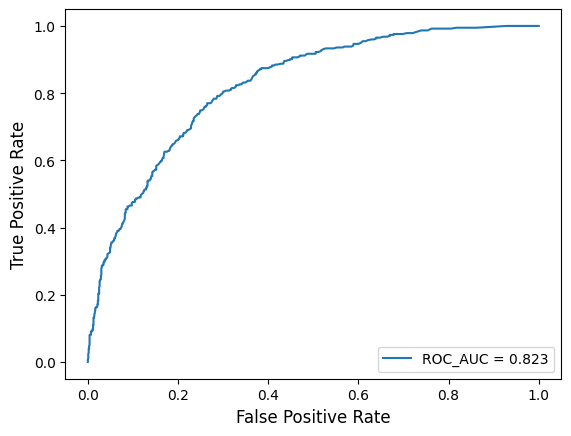

In [84]:
rf_pipe_pred_proba = rf_pipe.predict_proba(X_test)[:,1]
rf_pipe_roc_auc = metrics.roc_auc_score(Y_test, rf_pipe_pred_proba)
print('ROC_AUC: ', rf_pipe_roc_auc)
rf_pipe_fpr, rf_pipe_tpr, thresholds = metrics.roc_curve(Y_test, rf_pipe_pred_proba)
plt.plot(rf_pipe_fpr,rf_pipe_tpr, label = 'ROC_AUC = %0.3f' % rf_pipe_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [85]:
xgb_model = XGBClassifier(learning_rate = 0.05 ,random_state = 42, eval_metric = 'logloss')

params_xgb_list = [50,75,100,150,200,250]
param_xgb = 'n_estimators'
cv_function(xgb_model, param_xgb, params_xgb_list)

Hyperparameter:  n_estimators
Parameter: 50.00 - AUC(SD): 0.8437 (0.0165)
Parameter: 75.00 - AUC(SD): 0.8446 (0.0156)
Parameter: 100.00 - AUC(SD): 0.8444 (0.0153)
Parameter: 150.00 - AUC(SD): 0.8427 (0.0150)
Parameter: 200.00 - AUC(SD): 0.8406 (0.0149)
Parameter: 250.00 - AUC(SD): 0.8389 (0.0150)


In [86]:
xgb_param = {'n_estimators': 75}
xgb_model.set_params(**xgb_param) 
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [87]:
xgb_model.fit(X_train, Y_train, eval_set = [(X_test,Y_test)])

pred_xgb = xgb_model.predict(X_test)

[0]	validation_0-logloss:0.67081
[1]	validation_0-logloss:0.65049
[2]	validation_0-logloss:0.63211
[3]	validation_0-logloss:0.61539
[4]	validation_0-logloss:0.60012
[5]	validation_0-logloss:0.58620
[6]	validation_0-logloss:0.57345
[7]	validation_0-logloss:0.56180
[8]	validation_0-logloss:0.55146
[9]	validation_0-logloss:0.54150
[10]	validation_0-logloss:0.53247
[11]	validation_0-logloss:0.52431
[12]	validation_0-logloss:0.51669
[13]	validation_0-logloss:0.50942
[14]	validation_0-logloss:0.50320
[15]	validation_0-logloss:0.49724
[16]	validation_0-logloss:0.49162
[17]	validation_0-logloss:0.48641
[18]	validation_0-logloss:0.48180
[19]	validation_0-logloss:0.47712
[20]	validation_0-logloss:0.47265
[21]	validation_0-logloss:0.46881
[22]	validation_0-logloss:0.46519
[23]	validation_0-logloss:0.46164
[24]	validation_0-logloss:0.45859
[25]	validation_0-logloss:0.45588
[26]	validation_0-logloss:0.45320
[27]	validation_0-logloss:0.45070
[28]	validation_0-logloss:0.44810
[29]	validation_0-loglos

In [88]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_xgb))
print("Test F1 Score: ",metrics.f1_score(Y_test, pred_xgb))

Test Accuracy:  0.8062455642299503
Test F1 Score:  0.5991189427312775


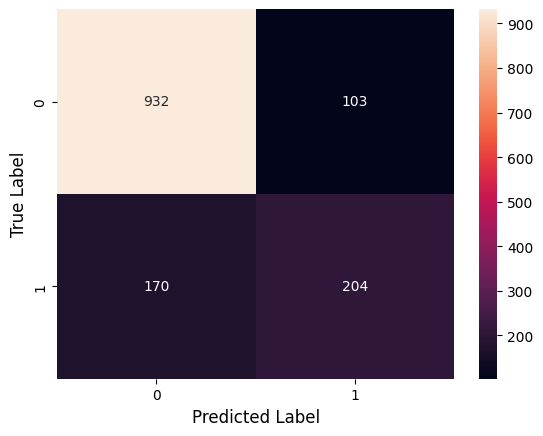

In [89]:
xgb_confusion_matrix = metrics.confusion_matrix(Y_test, pred_xgb)
sns.heatmap(xgb_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [90]:
print(metrics.classification_report(Y_test, pred_xgb, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



ROC_AUC:  0.8458833862925934


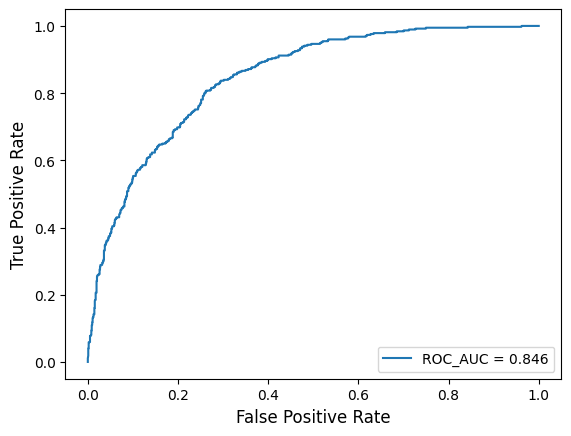

In [91]:
xgb_pred_proba = xgb_model.predict_proba(X_test)[:,1]
xgb_roc_auc = metrics.roc_auc_score(Y_test, xgb_pred_proba)
print('ROC_AUC: ', xgb_roc_auc)
xgb_fpr, xgb_tpr, thresholds = metrics.roc_curve(Y_test, xgb_pred_proba)

plt.plot(xgb_fpr,xgb_tpr, label = 'ROC_AUC = %0.3f' % xgb_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [92]:
categorical_ft = [x for x in X.columns if x not in num_features]
print(categorical_ft)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [105]:
cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC', cat_features = categorical_ft, verbose = 0)

params_cat_list = [50,75,100,150,200,250]
param_cat = 'n_estimators'
cv_function(cat_model, param_cat, params_cat_list)

Hyperparameter:  n_estimators
Parameter: 50.00 - AUC(SD): 0.8477 (0.0143)
Parameter: 75.00 - AUC(SD): 0.8481 (0.0139)
Parameter: 100.00 - AUC(SD): 0.8489 (0.0143)
Parameter: 150.00 - AUC(SD): 0.8488 (0.0138)
Parameter: 200.00 - AUC(SD): 0.8469 (0.0151)
Parameter: 250.00 - AUC(SD): 0.8464 (0.0142)


In [106]:
cat_param = {'n_estimators':100}
cat_model.set_params(**cat_param) 

In [96]:
cat_model.fit(X_train, Y_train, eval_set = [(X_test,Y_test)], cat_features = categorical_ft)

pred_cat = cat_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat))
print("Test F1 Score: ",metrics.f1_score(Y_test, pred_cat))

Test Accuracy:  0.8126330731014905
Test F1 Score:  0.6106194690265487


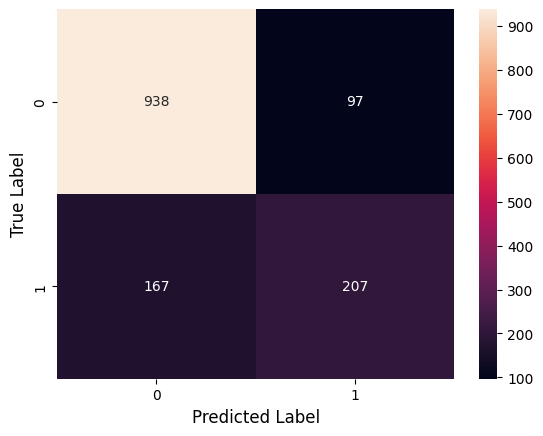

In [97]:
cat_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [98]:
print(metrics.classification_report(Y_test, pred_cat, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



ROC_AUC:  0.8489162727014391


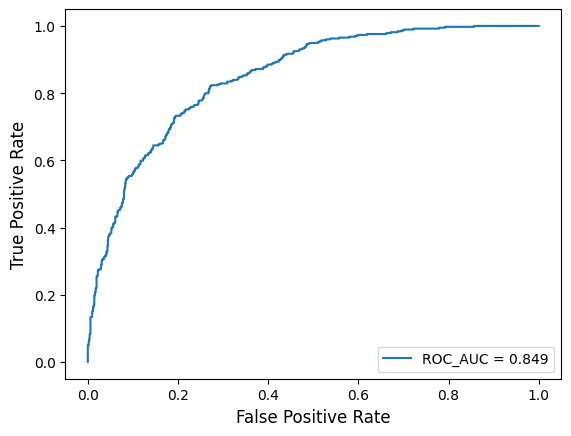

In [99]:
cat_pred_proba = cat_model.predict_proba(X_test)[:,1]
cat_roc_auc = metrics.roc_auc_score(Y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(Y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [100]:
pool = Pool(X_train, Y_train, cat_features=categorical_ft)

Feature_importance = pd.DataFrame({'feature_importance': cat_model.get_feature_importance(pool), 
                      'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

Feature_importance

,feature_importance,feature_names
17,22.551466,MonthlyCharges
14,20.307516,Contract
4,19.186518,tenure
8,6.065405,OnlineSecurity
18,4.904298,TotalCharges
16,4.508491,PaymentMethod
11,4.420525,TechSupport
15,3.839855,PaperlessBilling
6,2.596800,MultipleLines
1,1.831362,SeniorCitizen


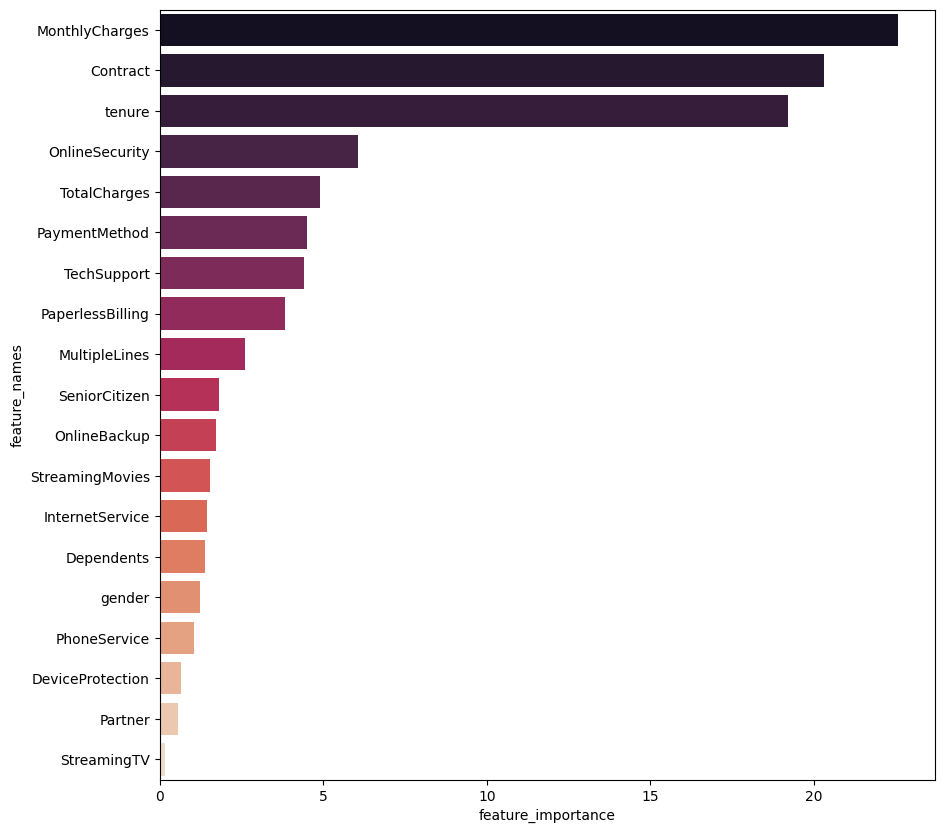

In [101]:
plt.figure(figsize=(10,10))
sns.barplot(x=Feature_importance['feature_importance'], y=Feature_importance['feature_names'], palette = 'rocket')

plt.show()

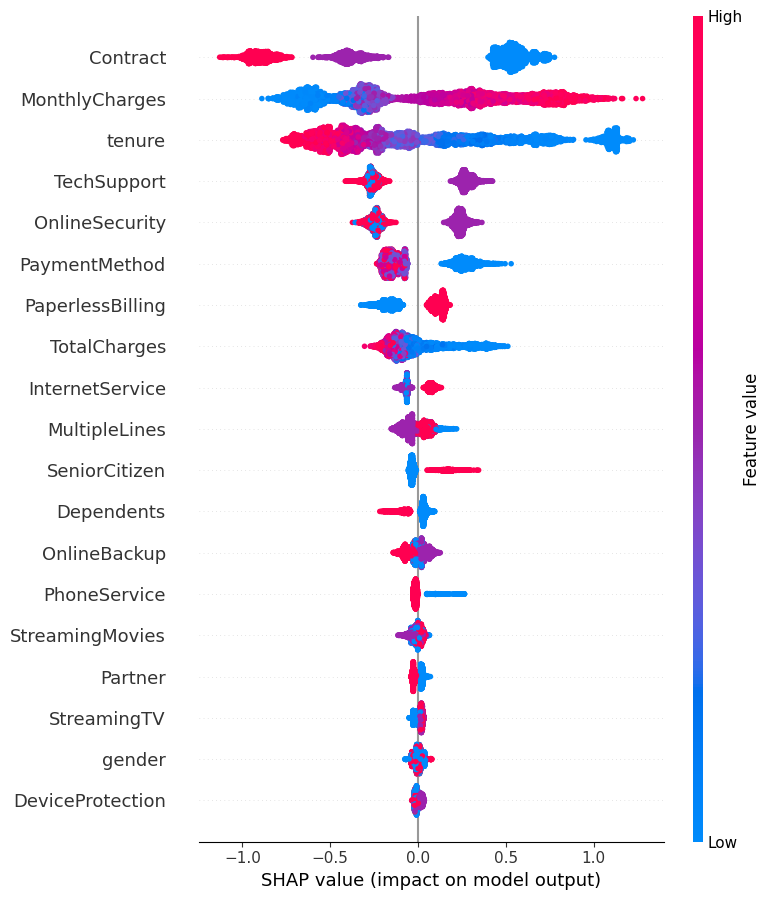

In [102]:
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(pool)

shap.summary_plot(shap_values, X_train)

In [103]:
custom_th_pred= np.where(cat_pred_proba>0.250, 1, 0)
print(metrics.classification_report(Y_test, custom_th_pred, labels = [0, 1], digits = 3))

              precision    recall  f1-score   support

           0      0.919     0.720     0.807      1035
           1      0.515     0.824     0.634       374

    accuracy                          0.747      1409
   macro avg      0.717     0.772     0.720      1409
weighted avg      0.811     0.747     0.761      1409



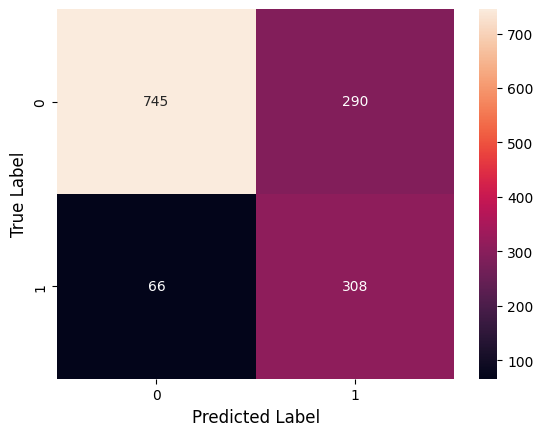

In [104]:
prob_confusion_matrix = metrics.confusion_matrix(Y_test, custom_th_pred)
sns.heatmap(prob_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()